In [494]:
# Global Power Plant Database Project
# Samrat Dey
# Batch - DS2312

In [495]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [496]:
df1=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')
pd.set_option('display.max_columns', None)
df1

country country_long                                 name   gppd_idnr  \
0       AUS    Australia                     Adelaide Airport  AUS0000433   
1       AUS    Australia                 Adelaide Showgrounds  AUS0000432   
2       AUS    Australia                     Albany Wind Farm  AUS0000065   
3       AUS    Australia                Alice Springs Airport  AUS0000469   
4       AUS    Australia                         Amcor Gawler  AUS0000231   
..      ...          ...                                  ...         ...   
507     AUS    Australia                           Yarrawonga  AUS0000101   
508     AUS    Australia                               Yarwun  AUS0000173   
509     AUS    Australia                             Yuendumu  AUS0000465   
510     AUS    Australia                               Yulara  AUS0000257   
511     AUS    Australia  Yurralyi Maya (Karratha Seven Mile)  AUS0000218   

     capacity_mw  latitude  longitude primary_fuel  other_fuel1  other_fuel2  \
0           0.11  -34.9387   138.5377        Solar          NaN          NaN   
1           1.00  -34.9453   138.5882        Solar          NaN          NaN   
2          21.60  -35.0641   117.7977         Wind          NaN          NaN   
3           0.24  -23.7966   133.8971        Solar          NaN          NaN   
4           4.00  -34.5509   138.7659          Oil          NaN          NaN   
..           ...       ...        ...          ...          ...          ...   
507         9.00  -36.0094   145.9995        Hydro          NaN          NaN   
508       154.00  -23.8306   151.1519          Gas          NaN          NaN   
509         0.24  -22.2426   131.7931        Solar          NaN          NaN   
510        10.95  -25.2323   130.9912          Gas          NaN          NaN   
511       180.00  -20.7620   116.7420          Gas          NaN          NaN   

     other_fuel3  commissioning_year                                 owner  \
0            NaN              2011.0                  Adelaide Airport Ltd   
1            NaN                 NaN                  Adelaide Showgrounds   
2            NaN                 NaN                          Verve Energy   
3            NaN              2004.0                 Alice Springs Airport   
4            NaN              2015.0                       Energy Response   
..           ...                 ...                                   ...   
507          NaN                 NaN                    AGL Energy Pty Ltd   
508          NaN                 NaN  Rio Tinto Australia - Yarwun Pty Ltd   
509          NaN                 NaN           Power and Water Corporation   
510          NaN              1990.0                         NT Government   
511          NaN              2010.0           Rio Tinto Australia Pty Ltd   

                                                source  \
0    Australian Renewable Energy Mapping Infrastruc...   
1    Australian Renewable Energy Mapping Infrastruc...   
2    Australian Renewable Energy Mapping Infrastruc...   
3    Australian Renewable Energy Mapping Infrastruc...   
4    Australian Renewable Energy Mapping Infrastruc...   
..                                                 ...   
507  Australian Renewable Energy Mapping Infrastruc...   
508  Australian Renewable Energy Mapping Infrastruc...   
509  Australian Renewable Energy Mapping Infrastruc...   
510  Australian Renewable Energy Mapping Infrastruc...   
511  Australian Renewable Energy Mapping Infrastruc...   

                                 url  \
0    https://www.nationalmap.gov.au/   
1    https://www.nationalmap.gov.au/   
2    https://www.nationalmap.gov.au/   
3    https://www.nationalmap.gov.au/   
4    https://www.nationalmap.gov.au/   
..                               ...   
507  https://www.nationalmap.gov.au/   
508  https://www.nationalmap.gov.au/   
509  https://www.nationalmap.gov.au/   
510  https://www.nationalmap.gov.au/   
511  https://www.nationalmap.gov.au/   

   

In [497]:
df2=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
pd.set_option('display.max_columns', None)
df2

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                owner  \
0            NaN              2011.0                          Solar Paces   
1            NaN                 NaN                 Ultratech Cement ltd   
2            NaN                 NaN                                  AES   
3            NaN              2004.0                                  NaN   
4            NaN              2015.0                                  NaN   
..           ...                 ...                                  ...   
902          NaN              2016.0                                  NaN   
903          NaN                 NaN  Karnataka Power Corporation Limited   
904          NaN                 NaN                                  NaN   
905          NaN                 NaN                   Hindustan Zinc ltd   
906          NaN                 NaN                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source  wepp_id  year_of_cap

In [498]:
df3=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')
pd.set_option('display.max_columns', None)
df3

country              country_long                            name  \
0         USA  United States of America  10 Briggs Solar NG  LLC (East)   
1         USA  United States of America      100 Brook Hill Drive Solar   
2         USA  United States of America      1001 Ebenezer Church Solar   
3         USA  United States of America             1008 Matthews Solar   
4         USA  United States of America               1009 Yadkin Solar   
...       ...                       ...                             ...   
11874     USA  United States of America        Zotos International WPGF   
11875     USA  United States of America   Zumbro Community Solar Garden   
11876     USA  United States of America             Zumbro Solar Garden   
11877     USA  United States of America                            Zuni   
11878     USA  United States of America             eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1      USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2      USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3      USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4      USA0063445          0.0   36.1475   -80.6561          NaN         NaN   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2 other_fuel3  commissioning_year  \
0             NaN         NaN                 NaN   
1             NaN         NaN          2016.00000   
2             NaN         NaN                 NaN   
3             NaN         NaN                 NaN   
4             NaN         NaN                 NaN   
...           ...         ...                 ...   
11874         NaN         NaN          2012.00000   
11875         NaN         NaN          2018.00000   
11876         NaN         NaN                 NaN   
11877         NaN         NaN                 NaN   
11878         NaN         NaN          2013.77551   

                                 owner  \
0              10 Briggs Solar NG  LLC   
1                   Diamond Properties   
2      1001 Ebenezer Church Solar  LLC   
3             1008 Matthews Solar  LLC   
4               1009 Yadkin Solar  LLC   
...                                ...   
11874              Zotos International   
11875                 Zumbro Solar LLC   
11876                Zumbro Garden LLC   
11877    Public Service Co of Colorado   
11878                     Bloom Energy   

                                       source  \
0      U.S. Energy Information Administration   
1      U.S. Energy Information Administration   
2      U.S. Energy Information Administration   
3      U.S. Energy Information Administration   
4      U.S. Energy Information Administration   
...                                       ...   
11874  U.S. Energy Information Administration   
11875  U.S. Energy Information Administration   
11876  U.S. Energy Information Administration   
11877  U.S. Energy Information Administration   
11878  U.S. Energy Information Administration   

                                                url  \
0      http://www.eia.gov/electricity/data/browser/   
1      http://www.eia.gov/electricity/data/browser/   
2      http://www.eia.gov/electricity/data/browser/   
3      http://www.eia.gov/electricity/data/browser/   
4      http://www.eia.gov/electricity/data/browser/   
...                                             ...   
11874  http://www.eia.gov/el

In [499]:
df = pd.concat([df1, df2, df3])
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar         NaN   
1      AUS0000432         1.00  -34.9453   138.5882        Solar         NaN   
2      AUS0000065        21.60  -35.0641   117.7977         Wind         NaN   
3      AUS0000469         0.24  -23.7966   133.8971        Solar         NaN   
4      AUS0000231         4.00  -34.5509   138.7659          Oil         NaN   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648         3.40   42.8869   -76.9683         Wind         NaN   
11875  USA0061574         1.00   44.3195   -92.6703        Solar         NaN   
11876  USA0063426         0.00   44.0460   -92.7600          NaN         NaN   
11877  USA0000478         0.00   39.7373  -105.0170          NaN         NaN   
11878  USA0059281         9.80   40.5606  -112.0478          Gas         NaN   

      other_fuel2 other_fuel3  commissioning_year  \
0             NaN         NaN          2011.00000   
1             NaN         NaN                 NaN   
2             NaN         NaN                 NaN   
3             NaN         NaN          2004.00000   
4             NaN         NaN          2015.00000   
...           ...         ...                 ...   
11874         NaN         NaN          2012.00000   
11875         NaN         NaN          2018.00000   
11876         NaN         NaN                 NaN   
11877         NaN         NaN                 NaN   
11878         NaN         NaN          2013.77551   

                               owner  \
0               Adelaide Airport Ltd   
1               Adelaide Showgrounds   
2                       Verve Energy   
3              Alice Springs Airport   
4                    Energy Response   
...                              ...   
11874            Zotos International   
11875               Zumbro Solar LLC   
11876              Zumbro Garden LLC   
11877  Public Service Co of Colorado   
11878                   Bloom Energy   

                                                  source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

                                                url  \
0                   https://www.nationalmap.gov.au/   
1                   https://www.nationalmap.gov.au/   
2                   https://www.nationalmap.gov.au/   
3                   https://www.nationalmap.gov.au/   
4                   https://www.nationalma

The dataset contains database of power plants around the world, which contains both numerical ad categorical data. Here, in the first case, 'primary_fuel' is the target variable which contains categorical data, so it will be a 'Classification Problem' where we need to predict the prmary fuel type. In the second case, 'capacity_mw' is the target variable which contains continuous data, so it will be a 'Regression Problem' where we need to predict the electrical generating capacity in megawatts.

In [501]:
df.shape

(13298, 27)

The dataset contains 13298 rows and 27 columns, out of which 1 column is taraget variable and the remaining 26 columns are independent variables

In [502]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [503]:
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [504]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are two different types of data (float64 and object) present in the dataset

In [505]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [507]:
# Replacing null values in continuous column using mean and in categorical column using mode
for i in df.columns:
    if df[i].dtypes=="object":
        mode = df[i].mode()
        df[i]=df[i].fillna(mode[0])
    else:
        df[i]=df[i].fillna(df[i].mean())
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar         Oil   
1      AUS0000432         1.00  -34.9453   138.5882        Solar         Oil   
2      AUS0000065        21.60  -35.0641   117.7977         Wind         Oil   
3      AUS0000469         0.24  -23.7966   133.8971        Solar         Oil   
4      AUS0000231         4.00  -34.5509   138.7659          Oil         Oil   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648         3.40   42.8869   -76.9683         Wind         Oil   
11875  USA0061574         1.00   44.3195   -92.6703        Solar         Oil   
11876  USA0063426         0.00   44.0460   -92.7600        Solar         Oil   
11877  USA0000478         0.00   39.7373  -105.0170        Solar         Oil   
11878  USA0059281         9.80   40.5606  -112.0478          Gas         Oil   

      other_fuel2 other_fuel3  commissioning_year  \
0             Gas         Gas         2011.000000   
1             Gas         Gas         1998.184904   
2             Gas         Gas         1998.184904   
3             Gas         Gas         2004.000000   
4             Gas         Gas         2015.000000   
...           ...         ...                 ...   
11874         Gas         Gas         2012.000000   
11875         Gas         Gas         2018.000000   
11876         Gas         Gas         1998.184904   
11877         Gas         Gas         1998.184904   
11878         Gas         Gas         2013.775510   

                               owner  \
0               Adelaide Airport Ltd   
1               Adelaide Showgrounds   
2                       Verve Energy   
3              Alice Springs Airport   
4                    Energy Response   
...                              ...   
11874            Zotos International   
11875               Zumbro Solar LLC   
11876              Zumbro Garden LLC   
11877  Public Service Co of Colorado   
11878                   Bloom Energy   

                                                  source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

                                                url  \
0                   https://www.nationalmap.gov.au/   
1                   https://www.nationalmap.gov.au/   
2                   https://www.nationalmap.gov.au/   
3                   https://www.nationalmap.gov.au/   
4                   https://www.nationalma

In [508]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                     0
other_fuel2                     0
other_fuel3                     0
commissioning_year              0
owner                           0
source                          0
url                             0
geolocation_source              0
wepp_id                     13298
year_of_capacity_data           0
generation_gwh_2013             0
generation_gwh_2014             0
generation_gwh_2015             0
generation_gwh_2016             0
generation_gwh_2017             0
generation_gwh_2018             0
generation_gwh_2019             0
generation_data_source          0
estimated_generation_gwh    13298
dtype: int64

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13298 non-null  float64
 5   latitude                  13298 non-null  float64
 6   longitude                 13298 non-null  float64
 7   primary_fuel              13298 non-null  object 
 8   other_fuel1               13298 non-null  object 
 9   other_fuel2               13298 non-null  object 
 10  other_fuel3               13298 non-null  object 
 11  commissioning_year        13298 non-null  float64
 12  owner                     13298 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [510]:
# Droping wepp_id and estimated_generation_gwh Columns
df.drop("wepp_id", axis=1, inplace=True)
df.drop("estimated_generation_gwh", axis=1, inplace=True)
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar         Oil   
1      AUS0000432         1.00  -34.9453   138.5882        Solar         Oil   
2      AUS0000065        21.60  -35.0641   117.7977         Wind         Oil   
3      AUS0000469         0.24  -23.7966   133.8971        Solar         Oil   
4      AUS0000231         4.00  -34.5509   138.7659          Oil         Oil   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648         3.40   42.8869   -76.9683         Wind         Oil   
11875  USA0061574         1.00   44.3195   -92.6703        Solar         Oil   
11876  USA0063426         0.00   44.0460   -92.7600        Solar         Oil   
11877  USA0000478         0.00   39.7373  -105.0170        Solar         Oil   
11878  USA0059281         9.80   40.5606  -112.0478          Gas         Oil   

      other_fuel2 other_fuel3  commissioning_year  \
0             Gas         Gas         2011.000000   
1             Gas         Gas         1998.184904   
2             Gas         Gas         1998.184904   
3             Gas         Gas         2004.000000   
4             Gas         Gas         2015.000000   
...           ...         ...                 ...   
11874         Gas         Gas         2012.000000   
11875         Gas         Gas         2018.000000   
11876         Gas         Gas         1998.184904   
11877         Gas         Gas         1998.184904   
11878         Gas         Gas         2013.775510   

                               owner  \
0               Adelaide Airport Ltd   
1               Adelaide Showgrounds   
2                       Verve Energy   
3              Alice Springs Airport   
4                    Energy Response   
...                              ...   
11874            Zotos International   
11875               Zumbro Solar LLC   
11876              Zumbro Garden LLC   
11877  Public Service Co of Colorado   
11878                   Bloom Energy   

                                                  source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

                                                url  \
0                   https://www.nationalmap.gov.au/   
1                   https://www.nationalmap.gov.au/   
2                   https://www.nationalmap.gov.au/   
3                   https://www.nationalmap.gov.au/   
4                   https://www.nationalma

After Data cleaning, the dataset contains 13298 rows and 25 columns, out of which 1 column is taraget variable and the remaining 24 columns are independent variables

In [511]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
other_fuel3               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   country_long            13298 non-null  object 
 2   name                    13298 non-null  object 
 3   gppd_idnr               13298 non-null  object 
 4   capacity_mw             13298 non-null  float64
 5   latitude                13298 non-null  float64
 6   longitude               13298 non-null  float64
 7   primary_fuel            13298 non-null  object 
 8   other_fuel1             13298 non-null  object 
 9   other_fuel2             13298 non-null  object 
 10  other_fuel3             13298 non-null  object 
 11  commissioning_year      13298 non-null  float64
 12  owner                   13298 non-null  object 
 13  source                  13298 non-null  object 
 14  url                     13298 non-null

In [513]:
# Droping generation_gwh_2019 Column
df.drop("generation_gwh_2019", axis=1, inplace=True)
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar         Oil   
1      AUS0000432         1.00  -34.9453   138.5882        Solar         Oil   
2      AUS0000065        21.60  -35.0641   117.7977         Wind         Oil   
3      AUS0000469         0.24  -23.7966   133.8971        Solar         Oil   
4      AUS0000231         4.00  -34.5509   138.7659          Oil         Oil   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648         3.40   42.8869   -76.9683         Wind         Oil   
11875  USA0061574         1.00   44.3195   -92.6703        Solar         Oil   
11876  USA0063426         0.00   44.0460   -92.7600        Solar         Oil   
11877  USA0000478         0.00   39.7373  -105.0170        Solar         Oil   
11878  USA0059281         9.80   40.5606  -112.0478          Gas         Oil   

      other_fuel2 other_fuel3  commissioning_year  \
0             Gas         Gas         2011.000000   
1             Gas         Gas         1998.184904   
2             Gas         Gas         1998.184904   
3             Gas         Gas         2004.000000   
4             Gas         Gas         2015.000000   
...           ...         ...                 ...   
11874         Gas         Gas         2012.000000   
11875         Gas         Gas         2018.000000   
11876         Gas         Gas         1998.184904   
11877         Gas         Gas         1998.184904   
11878         Gas         Gas         2013.775510   

                               owner  \
0               Adelaide Airport Ltd   
1               Adelaide Showgrounds   
2                       Verve Energy   
3              Alice Springs Airport   
4                    Energy Response   
...                              ...   
11874            Zotos International   
11875               Zumbro Solar LLC   
11876              Zumbro Garden LLC   
11877  Public Service Co of Colorado   
11878                   Bloom Energy   

                                                  source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

                                                url  \
0                   https://www.nationalmap.gov.au/   
1                   https://www.nationalmap.gov.au/   
2                   https://www.nationalmap.gov.au/   
3                   https://www.nationalmap.gov.au/   
4                   https://www.nationalma

<Axes: >

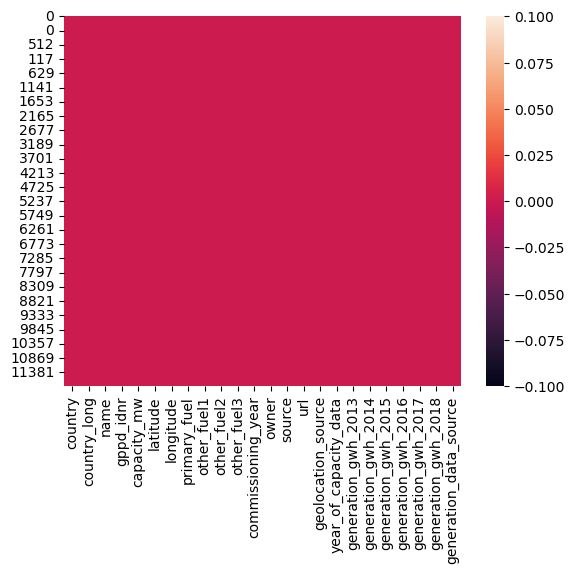

In [514]:
sns.heatmap(df.isnull())

In [515]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

No. of Unique values
country                                    3
country_long                               3
name                                   13266
gppd_idnr                              13298
capacity_mw                             2305
latitude                               12386
longitude                              12734
primary_fuel                              14
other_fuel1                               12
other_fuel2                               11
other_fuel3                                9
commissioning_year                      1937
owner                                   5877
source                                   206
url                                      325
geolocation_source                         5
year_of_capacity_data                      1
generation_gwh_2013                     5617
generation_gwh_2014                     6307
generation_gwh_2015                     6693
generation_gwh_2016                     7151
generation_gwh_2017                     7631
generation_gwh_2018                     8041
generation_data_source                     3

In [516]:
# Droping year_of_capacity_data Column
df.drop("year_of_capacity_data", axis=1, inplace=True)
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar         Oil   
1      AUS0000432         1.00  -34.9453   138.5882        Solar         Oil   
2      AUS0000065        21.60  -35.0641   117.7977         Wind         Oil   
3      AUS0000469         0.24  -23.7966   133.8971        Solar         Oil   
4      AUS0000231         4.00  -34.5509   138.7659          Oil         Oil   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648         3.40   42.8869   -76.9683         Wind         Oil   
11875  USA0061574         1.00   44.3195   -92.6703        Solar         Oil   
11876  USA0063426         0.00   44.0460   -92.7600        Solar         Oil   
11877  USA0000478         0.00   39.7373  -105.0170        Solar         Oil   
11878  USA0059281         9.80   40.5606  -112.0478          Gas         Oil   

      other_fuel2 other_fuel3  commissioning_year  \
0             Gas         Gas         2011.000000   
1             Gas         Gas         1998.184904   
2             Gas         Gas         1998.184904   
3             Gas         Gas         2004.000000   
4             Gas         Gas         2015.000000   
...           ...         ...                 ...   
11874         Gas         Gas         2012.000000   
11875         Gas         Gas         2018.000000   
11876         Gas         Gas         1998.184904   
11877         Gas         Gas         1998.184904   
11878         Gas         Gas         2013.775510   

                               owner  \
0               Adelaide Airport Ltd   
1               Adelaide Showgrounds   
2                       Verve Energy   
3              Alice Springs Airport   
4                    Energy Response   
...                              ...   
11874            Zotos International   
11875               Zumbro Solar LLC   
11876              Zumbro Garden LLC   
11877  Public Service Co of Colorado   
11878                   Bloom Energy   

                                                  source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

                                                url  \
0                   https://www.nationalmap.gov.au/   
1                   https://www.nationalmap.gov.au/   
2                   https://www.nationalmap.gov.au/   
3                   https://www.nationalmap.gov.au/   
4                   https://www.nationalma

In [517]:
# Seperating numerical and categorical columns
# Checking for categorical column
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns are:",cat_col)
print("\n")

# Checking for numerical column
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns are:",num_col)
print("\n")

Categorical Columns are: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


Numerical Columns are: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']




In [518]:
# Statistical summary of numerical columns
df.describe()

capacity_mw      latitude     longitude  commissioning_year  \
count  13298.000000  13298.000000  13298.000000        13298.000000   
mean     117.738717     35.053213    -73.794217         1998.184904   
std      347.090703     15.398830     62.684169           21.497701   
min        0.000000    -42.888300   -171.712400         1896.000000   
25%        1.500000     33.914250   -104.583400         1993.500000   
50%        5.500000     38.330650    -87.104400         2000.295163   
75%       52.975000     42.166025    -75.291600         2014.000000   
max     6809.000000    425.246100    153.434100         2020.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count         13298.000000         13298.000000         13298.000000   
mean            563.383222           635.739731           616.801877   
std            1490.941253          1650.744929          1665.401835   
min            -947.600000          -989.619000          -864.428000   
25%              15.063500            12.718750             9.140750   
50%             563.383222           635.739731           423.256996   
75%             563.383222           635.739731           616.801877   
max           31431.080000         32320.917000         32525.595000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count         13298.000000         13298.000000         13298.000000  
mean            561.784508           532.472482           513.679016  
std            1658.531703          1672.980485          1690.531234  
min            -768.620000          -934.944000          -982.622000  
25%               6.400250             5.034250             4.088500  
50%             199.777000           111.768000            63.282000  
75%             561.784508           532.472482           513.679016  
max           32377.477000         35116.000000         35136.000000

1. The counts of all the columns are same which means there are no missing values in the dataset
2. The mean value is greater than or equal to the median(50%) in the columns which means the data is skewed to right in most of the columns
3. By summerizing the data we can observe that there are difference between 75% and max in almost all the columns, hence there are outliers present in the data

Solar           5484
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64


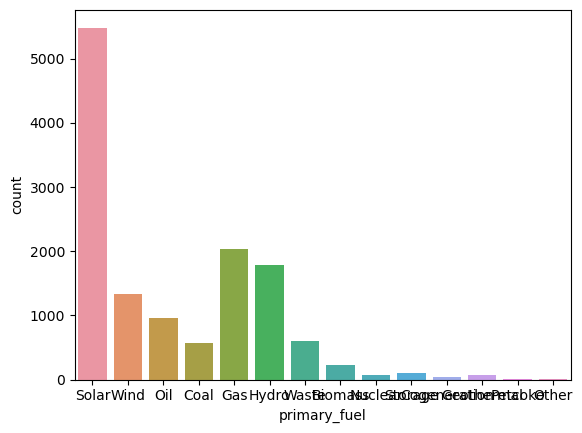

In [519]:
# Visualize the primary fuel among power plants
ax=sns.countplot(x='primary_fuel',data=df)
print(df['primary_fuel'].value_counts())

United States of America    11879
India                         907
Australia                     512
Name: country_long, dtype: int64


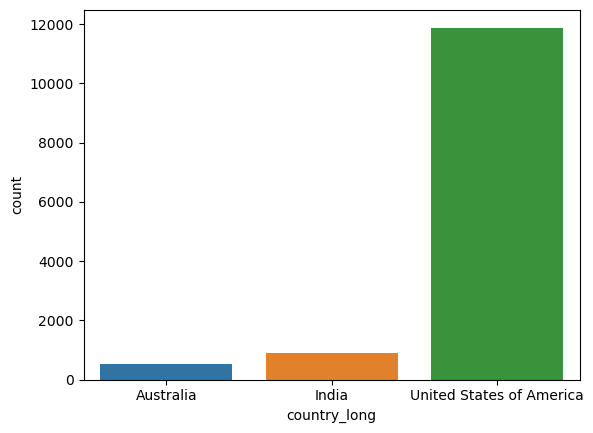

In [520]:
# Visualize the countries of the power plants
ax=sns.countplot(x='country_long',data=df)
print(df['country_long'].value_counts())

Oil             12656
Gas               351
Coal               71
Waste              63
Storage            43
Solar              30
Hydro              20
Biomass            19
Other              17
Petcoke            15
Wind                7
Cogeneration        6
Name: other_fuel1, dtype: int64


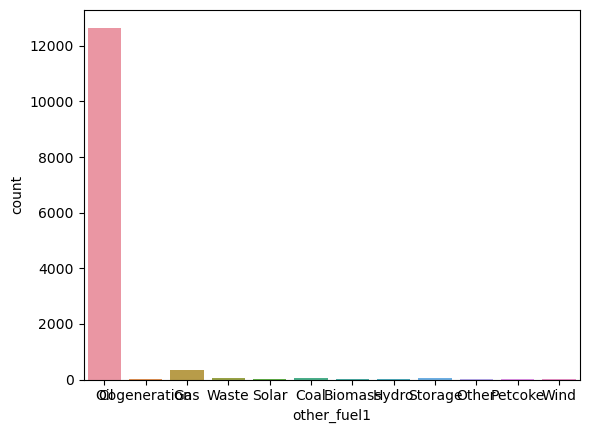

In [521]:
# Visualize the other fuel1 of power plants
ax=sns.countplot(x='other_fuel1',data=df)
print(df['other_fuel1'].value_counts())

Gas        13115
Oil           62
Other         32
Waste         31
Biomass       18
Solar         17
Storage        6
Hydro          6
Wind           4
Petcoke        4
Coal           3
Name: other_fuel2, dtype: int64


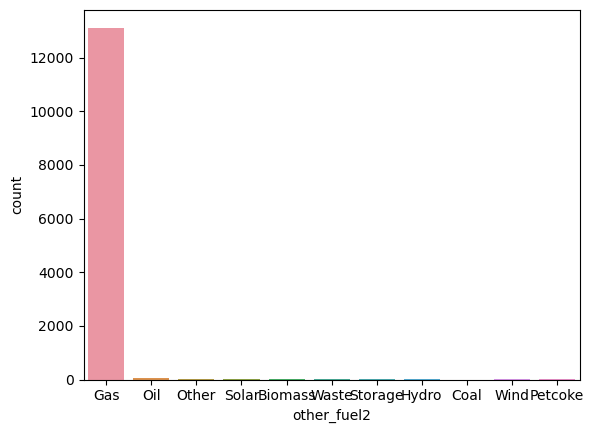

In [522]:
# Visualize the other fuel2 of power plants
ax=sns.countplot(x='other_fuel2',data=df)
print(df['other_fuel2'].value_counts())

Gas        13240
Other         20
Biomass       13
Hydro          6
Solar          5
Waste          5
Oil            5
Wind           2
Storage        2
Name: other_fuel3, dtype: int64


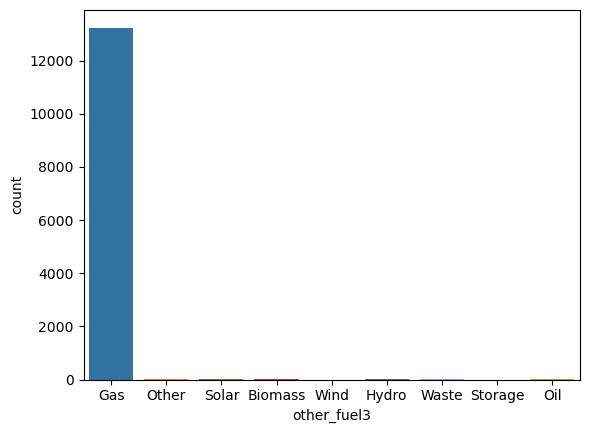

In [523]:
# Visualize the other fuel3 of power plants
ax=sns.countplot(x='other_fuel3',data=df)
print(df['other_fuel3'].value_counts())

U.S. Energy Information Administration                11856
WRI                                                     807
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
National Renewable Energy Laboratory                      4
Name: geolocation_source, dtype: int64


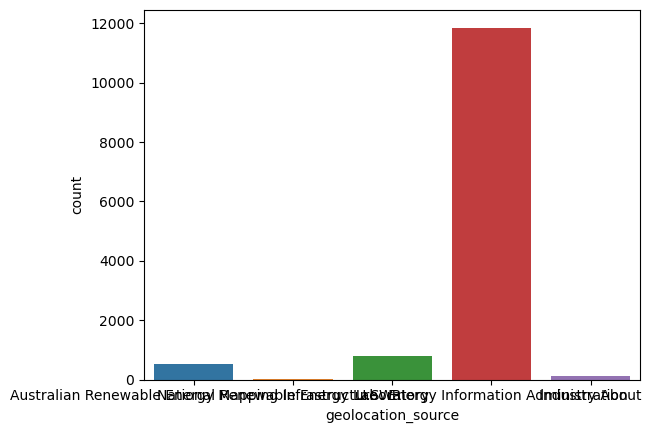

In [524]:
# Visualize the geolocation source of power plants
ax=sns.countplot(x='geolocation_source',data=df)
print(df['geolocation_source'].value_counts())

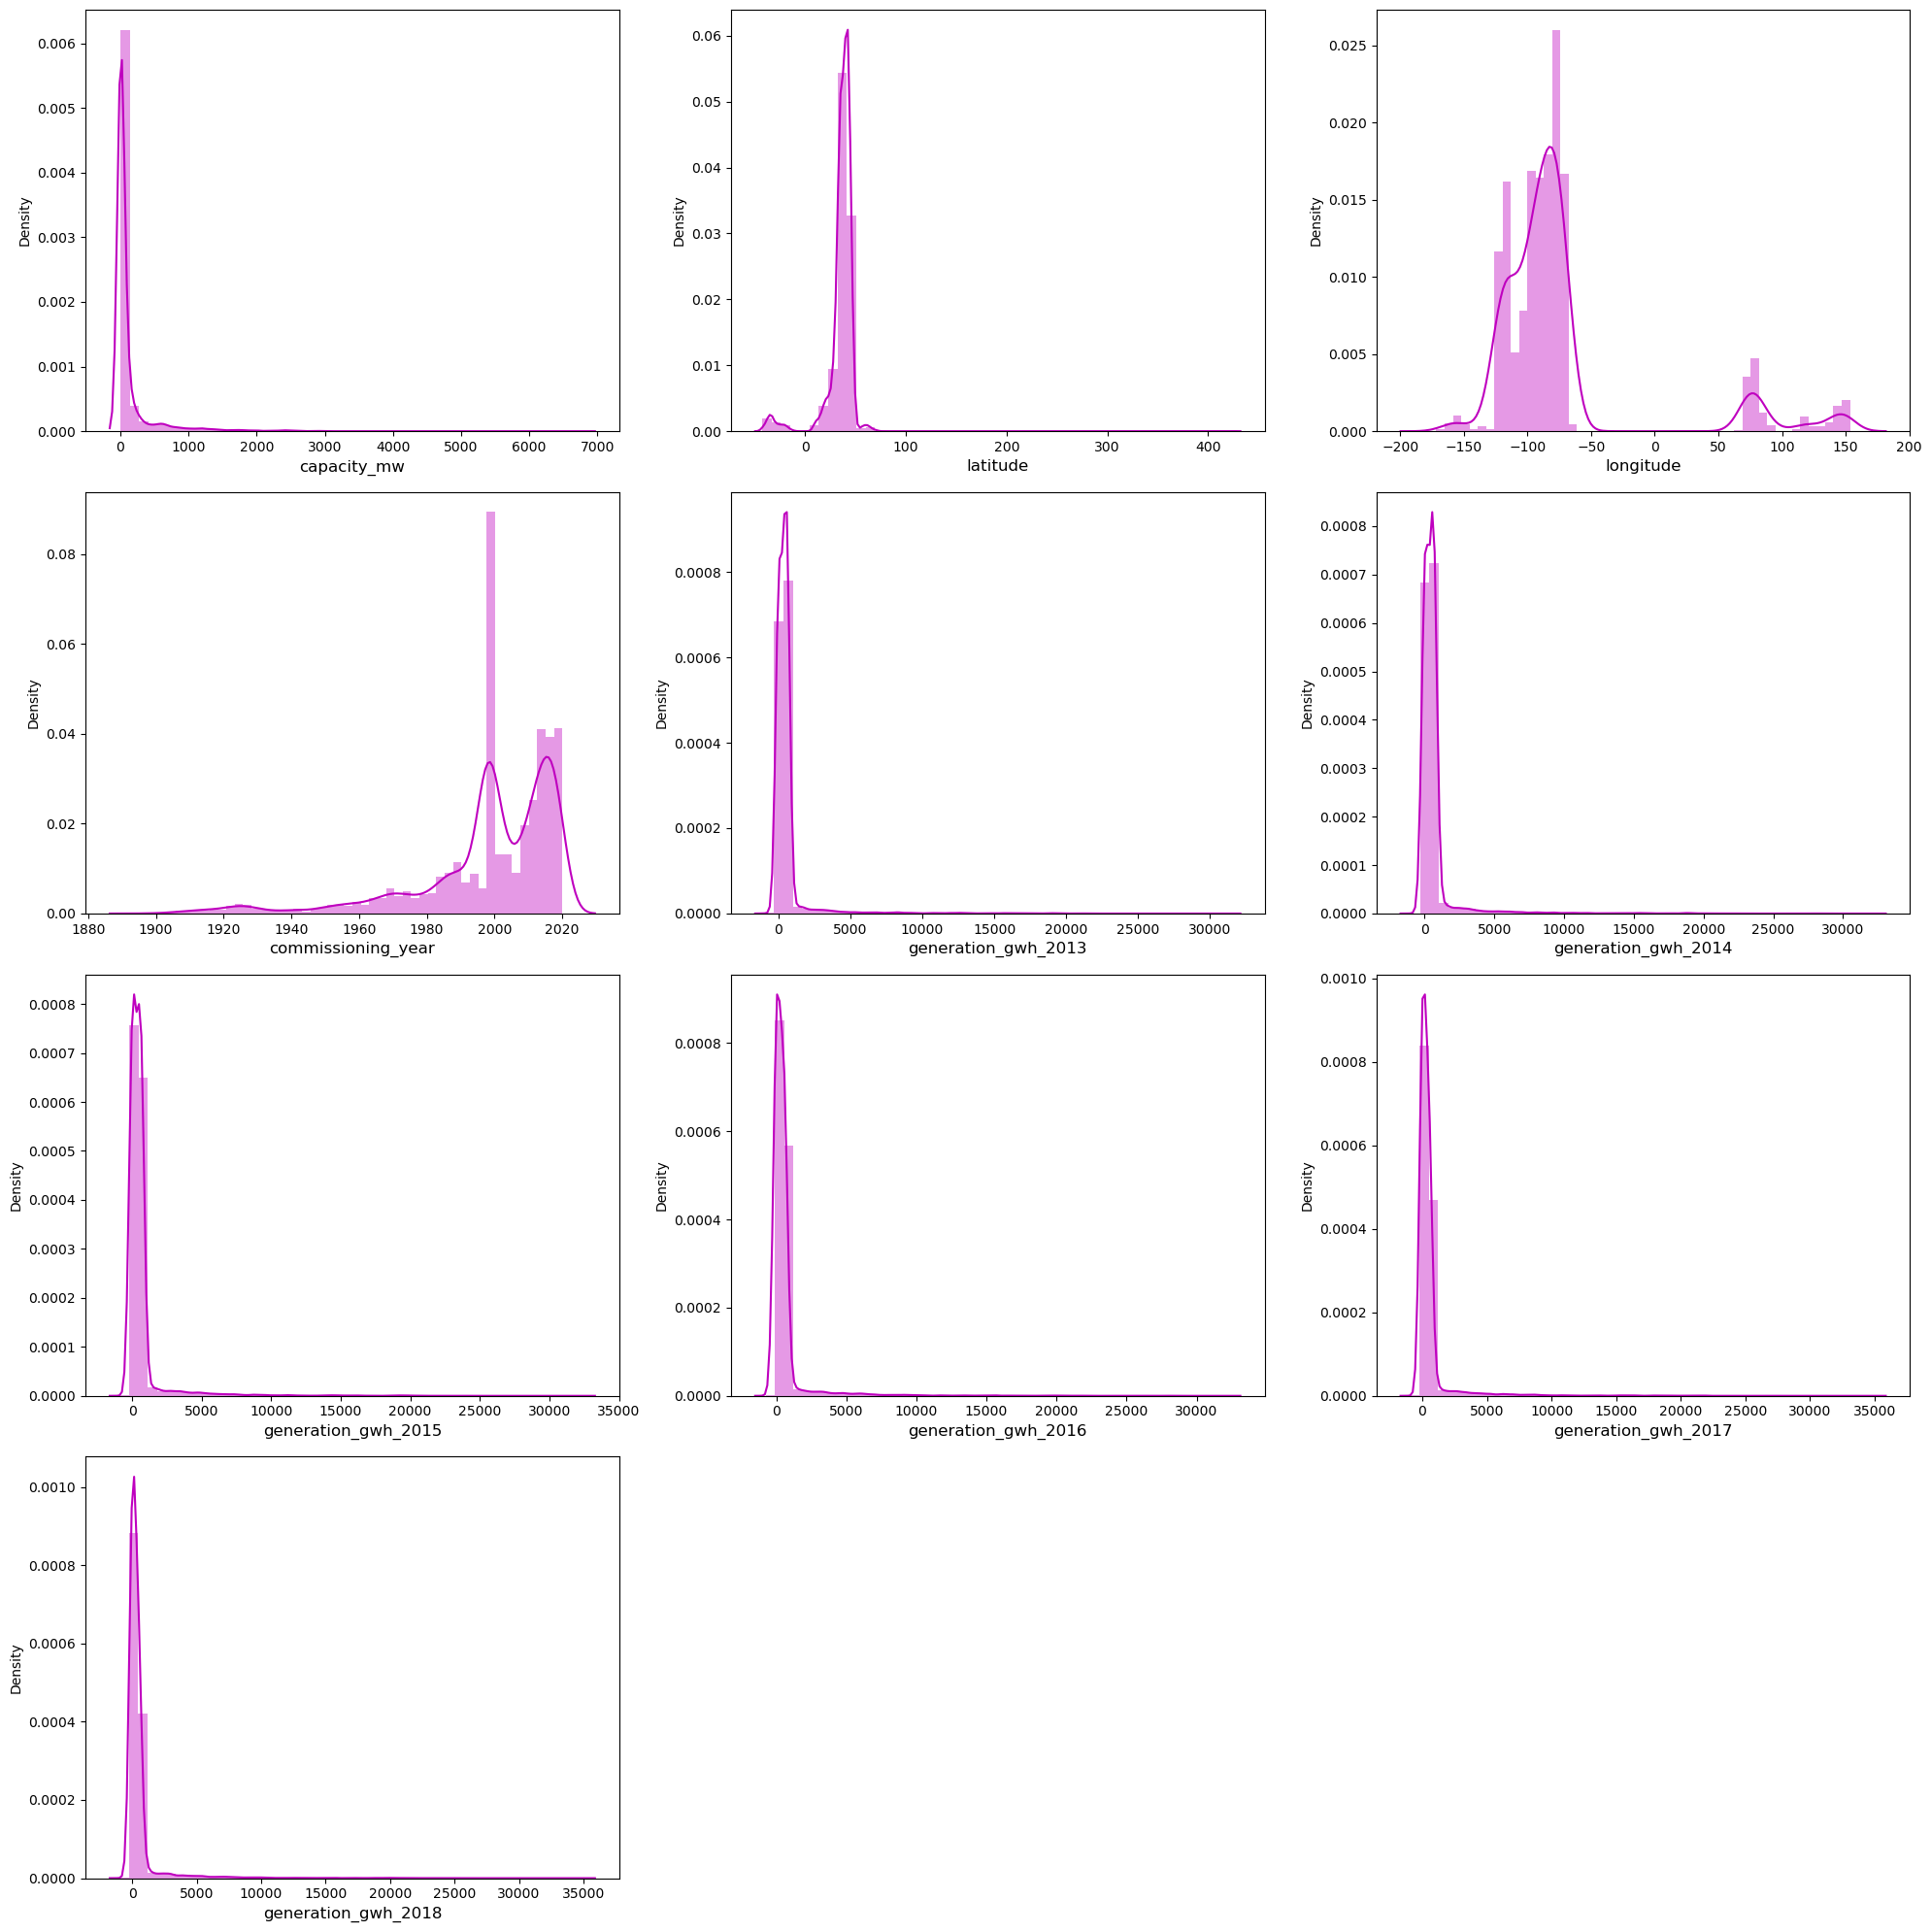

In [525]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

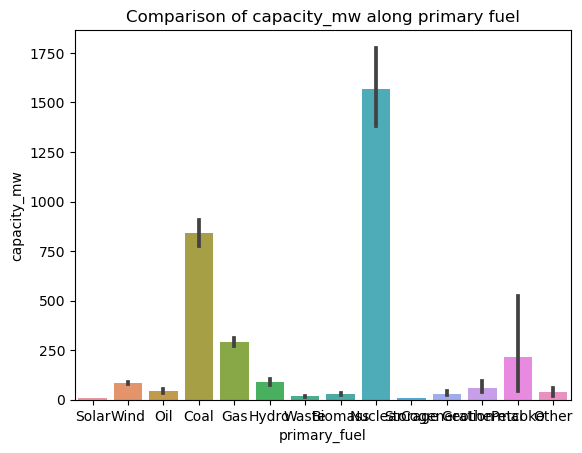

In [526]:
# Comparing capacity_mw along primary_fuel
plt.title("Comparison of capacity_mw along primary fuel")
sns.barplot(x="primary_fuel",y="capacity_mw",data=df)
plt.show()

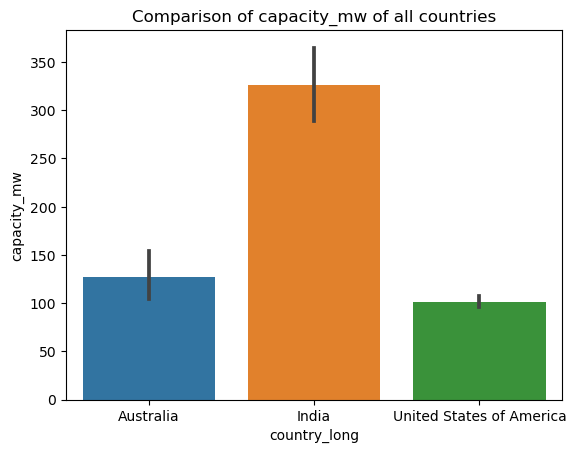

In [527]:
# Comparing capacity_mw of all countries
plt.title("Comparison of capacity_mw of all countries")
sns.barplot(x="country_long",y="capacity_mw",data=df)
plt.show()

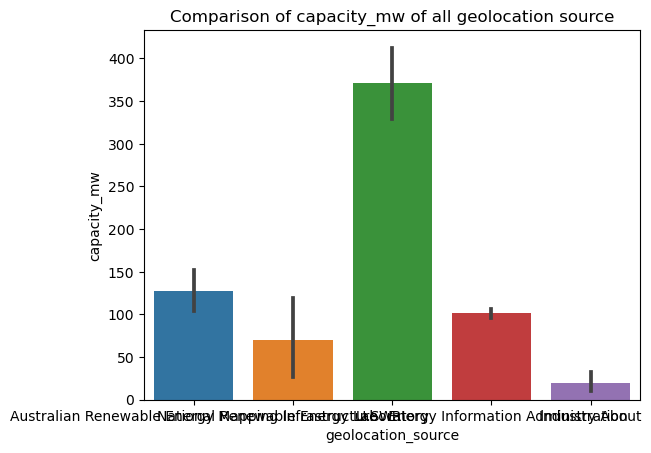

In [528]:
# Comparing capacity_mw of all geolocation_source
plt.title("Comparison of capacity_mw of all geolocation source")
sns.barplot(x="geolocation_source",y="capacity_mw",data=df)
plt.show()

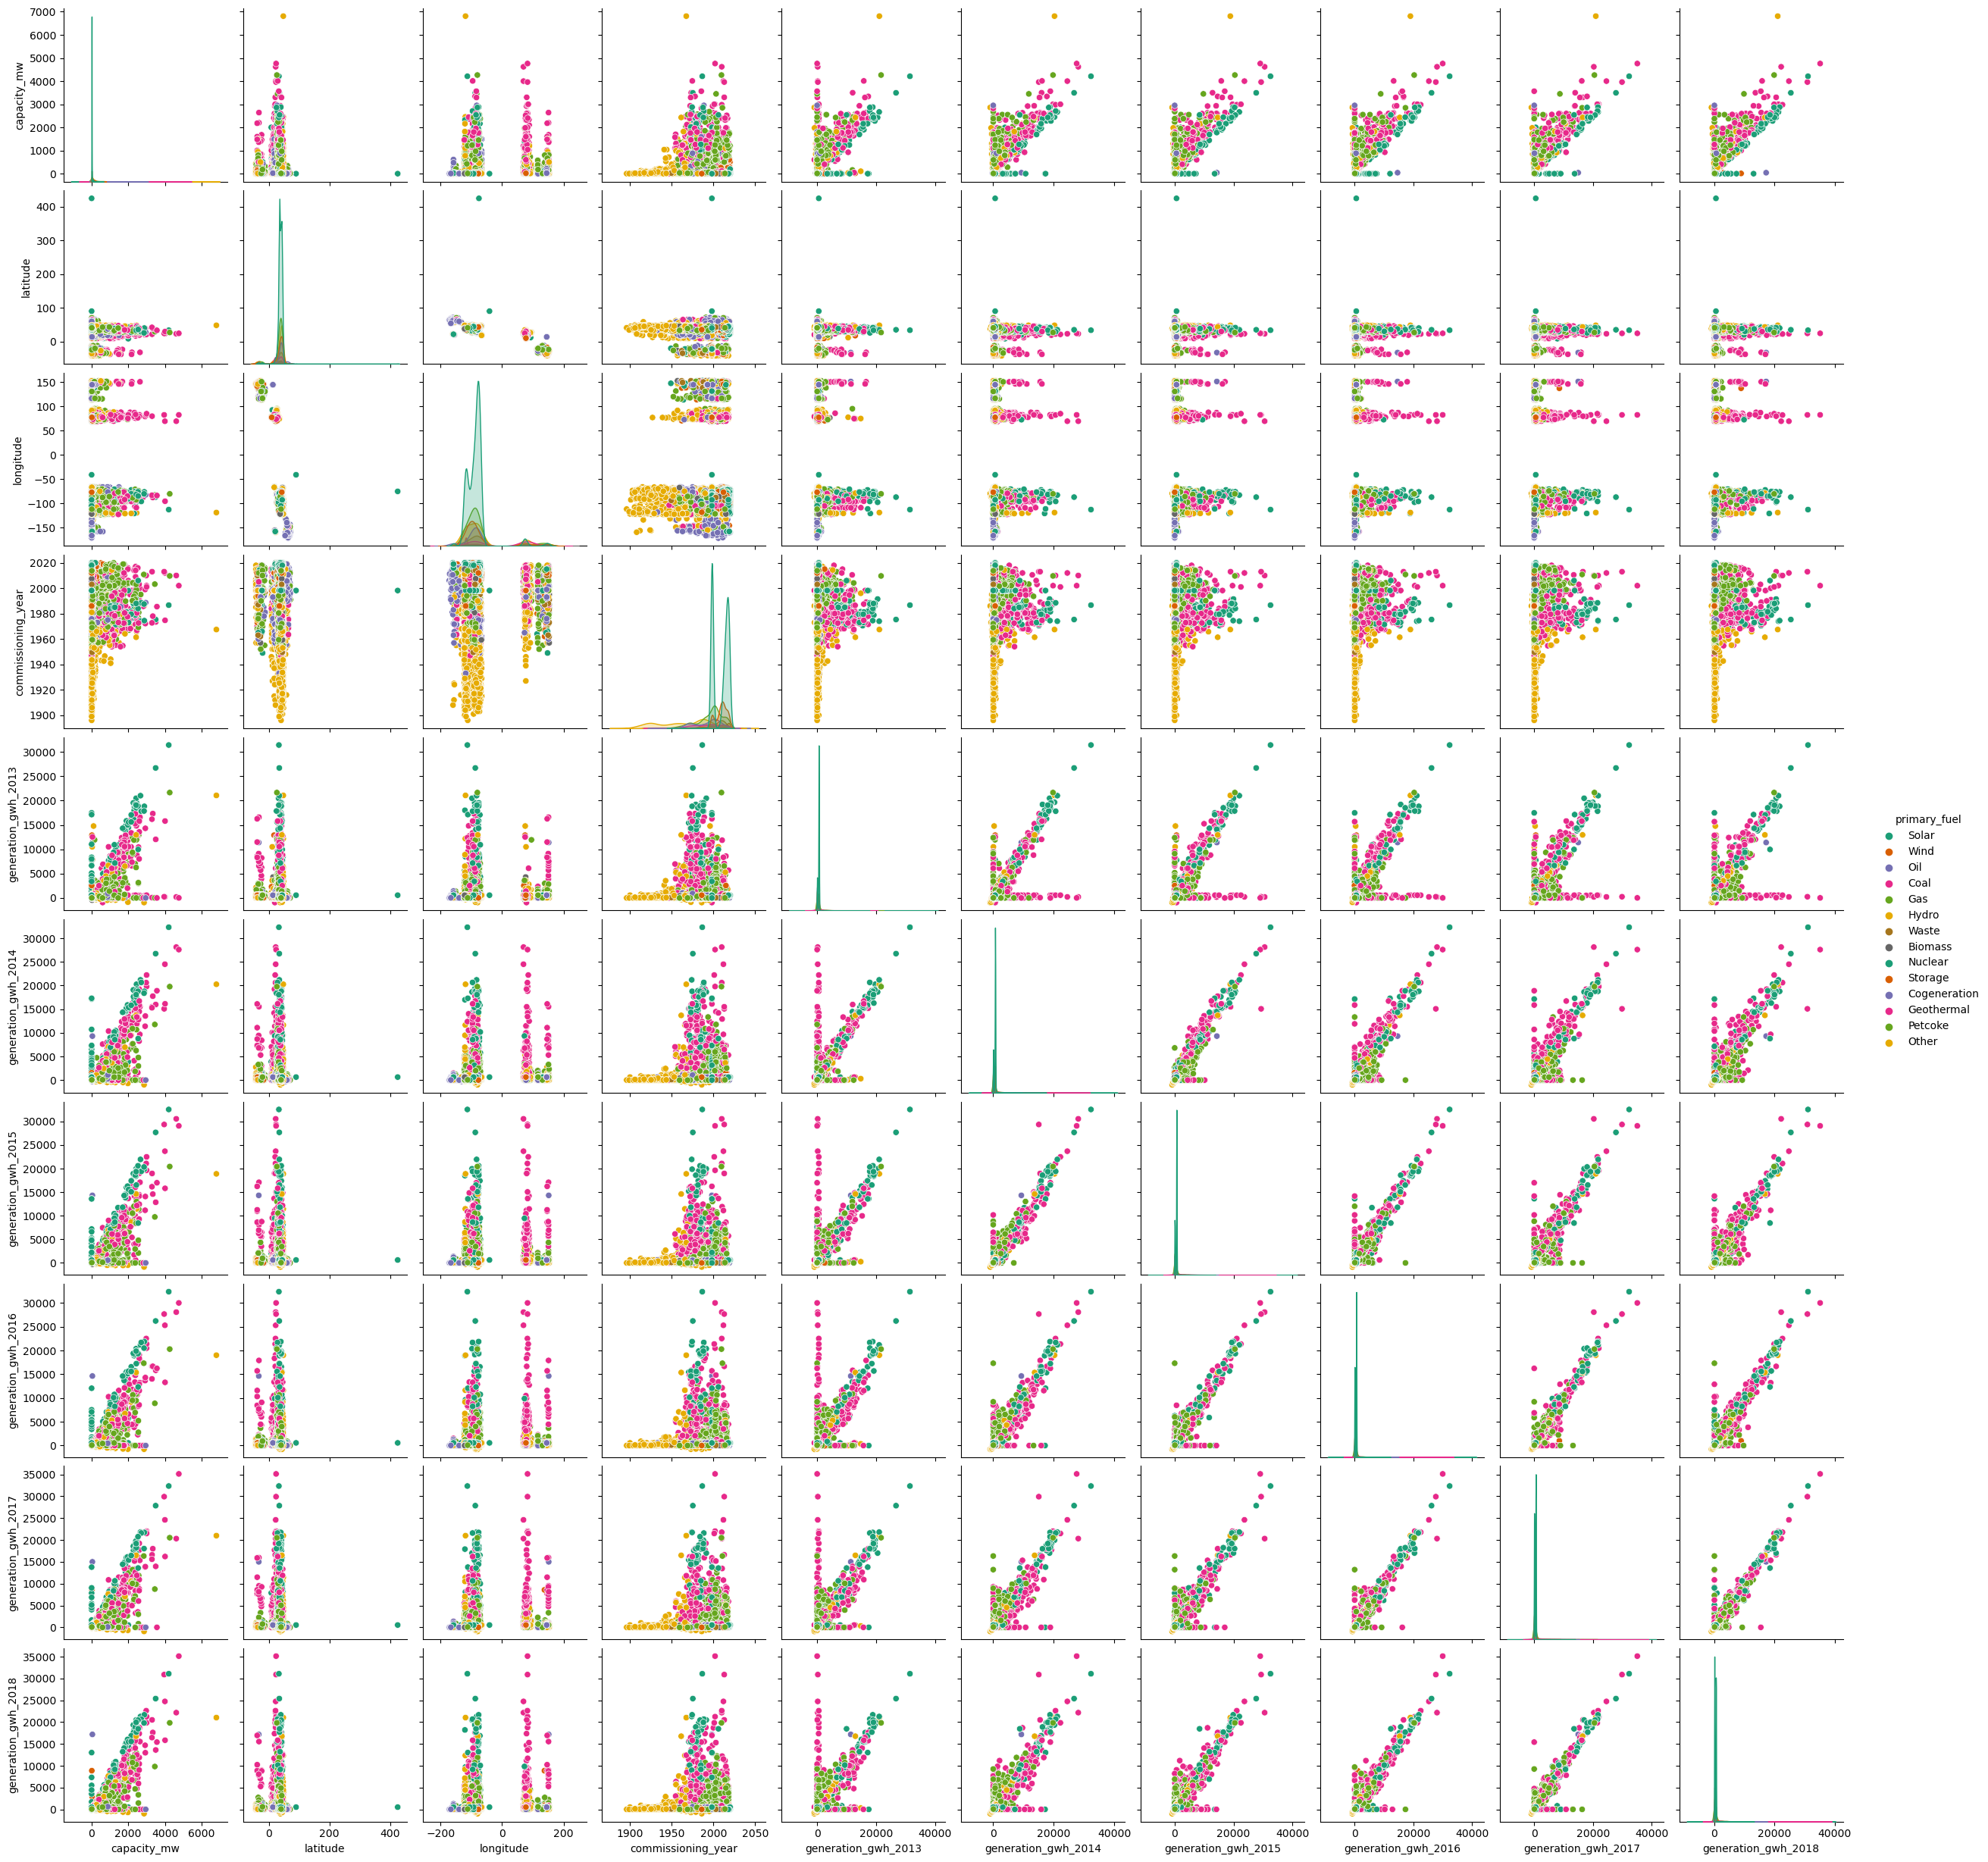

In [529]:
sns.pairplot(df,hue="primary_fuel",palette="Dark2")
plt.show()

In [530]:
df.skew()

capacity_mw            5.474681
latitude              -1.864012
longitude              2.331246
commissioning_year    -1.867007
generation_gwh_2013    8.468532
generation_gwh_2014    8.023305
generation_gwh_2015    8.187213
generation_gwh_2016    8.256460
generation_gwh_2017    8.343430
generation_gwh_2018    8.281069
dtype: float64

The columns have skewness in the data and we apply cuberoot method to remove skewness

In [531]:
df["capacity_mw"]=np.cbrt(df["capacity_mw"])
df["latitude"]=np.cbrt(df["latitude"])
df["longitude"]=np.cbrt(df["longitude"])
df["commissioning_year"]=np.cbrt(df["commissioning_year"])
df["generation_gwh_2013"]=np.cbrt(df["generation_gwh_2013"])
df["generation_gwh_2014"]=np.cbrt(df["generation_gwh_2014"])
df["generation_gwh_2015"]=np.cbrt(df["generation_gwh_2015"])
df["generation_gwh_2016"]=np.cbrt(df["generation_gwh_2016"])
df["generation_gwh_2017"]=np.cbrt(df["generation_gwh_2017"])
df["generation_gwh_2018"]=np.cbrt(df["generation_gwh_2018"])

In [532]:
df.skew()

capacity_mw            1.669318
latitude              -4.546755
longitude              2.565450
commissioning_year    -1.893382
generation_gwh_2013    0.717651
generation_gwh_2014    0.743241
generation_gwh_2015    0.850453
generation_gwh_2016    1.044387
generation_gwh_2017    1.211625
generation_gwh_2018    1.357508
dtype: float64

Many columns still have skewness in the data, so we apply cuberoot method one more time to remove skewness

In [533]:
df["capacity_mw"]=np.cbrt(df["capacity_mw"])
df["longitude"]=np.cbrt(df["longitude"])
df["generation_gwh_2016"]=np.cbrt(df["generation_gwh_2016"])
df["generation_gwh_2017"]=np.cbrt(df["generation_gwh_2017"])
df["generation_gwh_2018"]=np.cbrt(df["generation_gwh_2018"])

In [534]:
df.skew()

capacity_mw           -0.720340
latitude              -4.546755
longitude              2.595010
commissioning_year    -1.893382
generation_gwh_2013    0.717651
generation_gwh_2014    0.743241
generation_gwh_2015    0.850453
generation_gwh_2016   -1.372222
generation_gwh_2017   -1.281006
generation_gwh_2018   -1.181263
dtype: float64

Many columns still have skewness in the data, so we apply cuberoot method one more time to remove skewness

In [535]:
df["longitude"]=np.cbrt(df["longitude"])

In [536]:
df.skew()

capacity_mw           -0.720340
latitude              -4.546755
longitude              2.598342
commissioning_year    -1.893382
generation_gwh_2013    0.717651
generation_gwh_2014    0.743241
generation_gwh_2015    0.850453
generation_gwh_2016   -1.372222
generation_gwh_2017   -1.281006
generation_gwh_2018   -1.181263
dtype: float64

In [537]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

country  country_long     name  gppd_idnr  capacity_mw  latitude  \
0          0.0           0.0    192.0      411.0     0.782507 -3.269156   
1          0.0           0.0    193.0      410.0     1.000000 -3.269361   
2          0.0           0.0    254.0       60.0     1.406930 -3.273062   
3          0.0           0.0    280.0      446.0     0.853365 -2.876327   
4          0.0           0.0    380.0      223.0     1.166529 -3.257015   
...        ...           ...      ...        ...          ...       ...   
11874      2.0           2.0  13260.0     7059.0     1.145653  3.500324   
11875      2.0           2.0  13261.0    10616.0     1.000000  3.538873   
11876      2.0           2.0  13262.0    12370.0     0.000000  3.531578   
11877      2.0           2.0  13263.0     1352.0     0.000000  3.412449   
11878      2.0           2.0  13264.0     8526.0     1.288654  3.435855   

       longitude  primary_fuel  other_fuel1  other_fuel2  other_fuel3  \
0       1.200376          10.0          5.0          2.0          1.0   
1       1.200392          10.0          5.0          2.0          1.0   
2       1.193188          13.0          5.0          2.0          1.0   
3       1.198862          10.0          5.0          2.0          1.0   
4       1.200449           7.0          5.0          2.0          1.0   
...          ...           ...          ...          ...          ...   
11874  -1.174528          13.0          5.0          2.0          1.0   
11875  -1.182632          10.0          5.0          2.0          1.0   
11876  -1.182674          10.0          5.0          2.0          1.0   
11877  -1.188123          10.0          5.0          2.0          1.0   
11878  -1.190978           3.0          5.0          2.0          1.0   

       commissioning_year   owner  source    url  geolocation_source  \
0               12.622267   140.0    12.0  321.0                 0.0   
1               12.595398   141.0    12.0  321.0                 0.0   
2               12.595398  5533.0    12.0  321.0                 0.0   
3               12.607604   203.0    12.0  321.0                 0.0   
4               12.630630  1940.0    12.0  321.0                 0.0   
...                   ...     ...     ...    ...                 ...   
11874           12.624359  5872.0   185.0   68.0                 3.0   
11875           12.636895  5874.0   185.0   68.0                 3.0   
11876           12.595398  5873.0   185.0   68.0                 3.0   
11877           12.595398  4208.0   185.0   68.0                 3.0   
11878           12.628071   567.0   185.0   68.0                 3.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 8.259136             8.598574             8.512332   
1                 8.259136             8.598574             8.512332   
2                 4.474677             4.682123             4.587673   
3                 8.259136             8.598574             8.512332   
4                 8.259136             8.598574             8.512332   
...                    ...                  ...                  ...   
11874             1.542629             1.349959             1.355215   
11875             8.259136             8.598574             8.512332   
11876             8.259136             8.598574             8.512332   
11877             0.000000             0.000000             0.000000   
11878             2.349404             3.715107             4.150612   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 2.020727             2.008732             2.000728   
1                 2.020727             2.008732             2.000728   
2                 1.660307             1.640168             1.654075   
3                 2.020727             2.008732             2.000728   
4                 2.020727             2.008732             2.000728   
...                    ...                  ...                  ..

In [538]:
# Statistical summary of numerical columns
df.describe()

country  country_long          name     gppd_idnr   capacity_mw  \
count  13298.00000   13298.00000  13298.000000  13298.000000  13298.000000   
mean       1.85479       1.85479   6631.746879   6648.500000      1.187763   
std        0.44849       0.44849   3830.160427   3838.946275      0.595550   
min        0.00000       0.00000      0.000000      0.000000      0.000000   
25%        2.00000       2.00000   3314.250000   3324.250000      1.046082   
50%        2.00000       2.00000   6630.500000   6648.500000      1.208544   
75%        2.00000       2.00000   9947.750000   9972.750000      1.554402   
max        2.00000       2.00000  13265.000000  13297.000000      2.666233   

           latitude     longitude  primary_fuel   other_fuel1   other_fuel2  \
count  13298.000000  13298.000000  13298.000000  13298.000000  13298.000000   
mean       3.087570     -0.936862      7.808543      4.965935      2.043089   
std        1.264807      0.721892      3.663874      0.668120      0.480680   
min       -3.500362     -1.209958      0.000000      0.000000      0.000000   
25%        3.236886     -1.187941      5.000000      5.000000      2.000000   
50%        3.371698     -1.179922     10.000000      5.000000      2.000000   
75%        3.480601     -1.173570     10.000000      5.000000      2.000000   
max        7.519924      1.204925     13.000000     11.000000     10.000000   

        other_fuel3  commissioning_year         owner        source  \
count  13298.000000        13298.000000  13298.000000  13298.000000   
mean       1.010302           12.595234   2814.621447    168.578734   
std        0.216904            0.045480   1674.006730     48.804807   
min        0.000000           12.376926      0.000000      0.000000   
25%        1.000000           12.585547   1581.000000    185.000000   
50%        1.000000           12.599830   2634.000000    185.000000   
75%        1.000000           12.628540   4223.000000    185.000000   
max        8.000000           12.641069   5876.000000    205.000000   

                url  geolocation_source  generation_gwh_2013  \
count  13298.000000        13298.000000         13298.000000   
mean      80.022334            2.926982             6.056959   
std       53.040681            0.661816             4.025165   
min        0.000000            0.000000            -9.822190   
25%       68.000000            3.000000             2.469686   
50%       68.000000            3.000000             8.259136   
75%       68.000000            3.000000             8.259136   
max      324.000000            4.000000            31.558748   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count         13298.000000         13298.000000         13298.000000   
mean              6.215271             5.991356             1.566476   
std               4.259242             4.308995             0.672914   
min              -9.965276            -9.525979            -2.092351   
25%               2.334254             2.090871             1.229072   
50%               8.598574             7.508181             1.801425   
75%               8.598574             8.512332             2.020727   
max              31.853798            31.920897             3.170576   

       generation_gwh_2017  generation_gwh_2018  generation_data_source  
count         13298.000000         13298.000000            13298.000000  
mean              1.528241             1.495376                1.918935  
std               0.673255             0.671837                0.348463  
min              -2.138392            -2.150242                0.000000  
25%               1.196721             1.169369                2.000000  
50%               1.688849             1.585412                2.000000  
75%               2.008732             2.000728                2.000000  
max               3.199308             3.199511                2.000000

1. The counts of all the columns are same which means there are no missing values in the dataset
2. The mean value is less than the median(50%) in almost all the columns which means the data is skewed to left in these columns
3. By summerizing the data we can observe that there are difference between 75% and max in all the columns, hence there are outliers present in the data

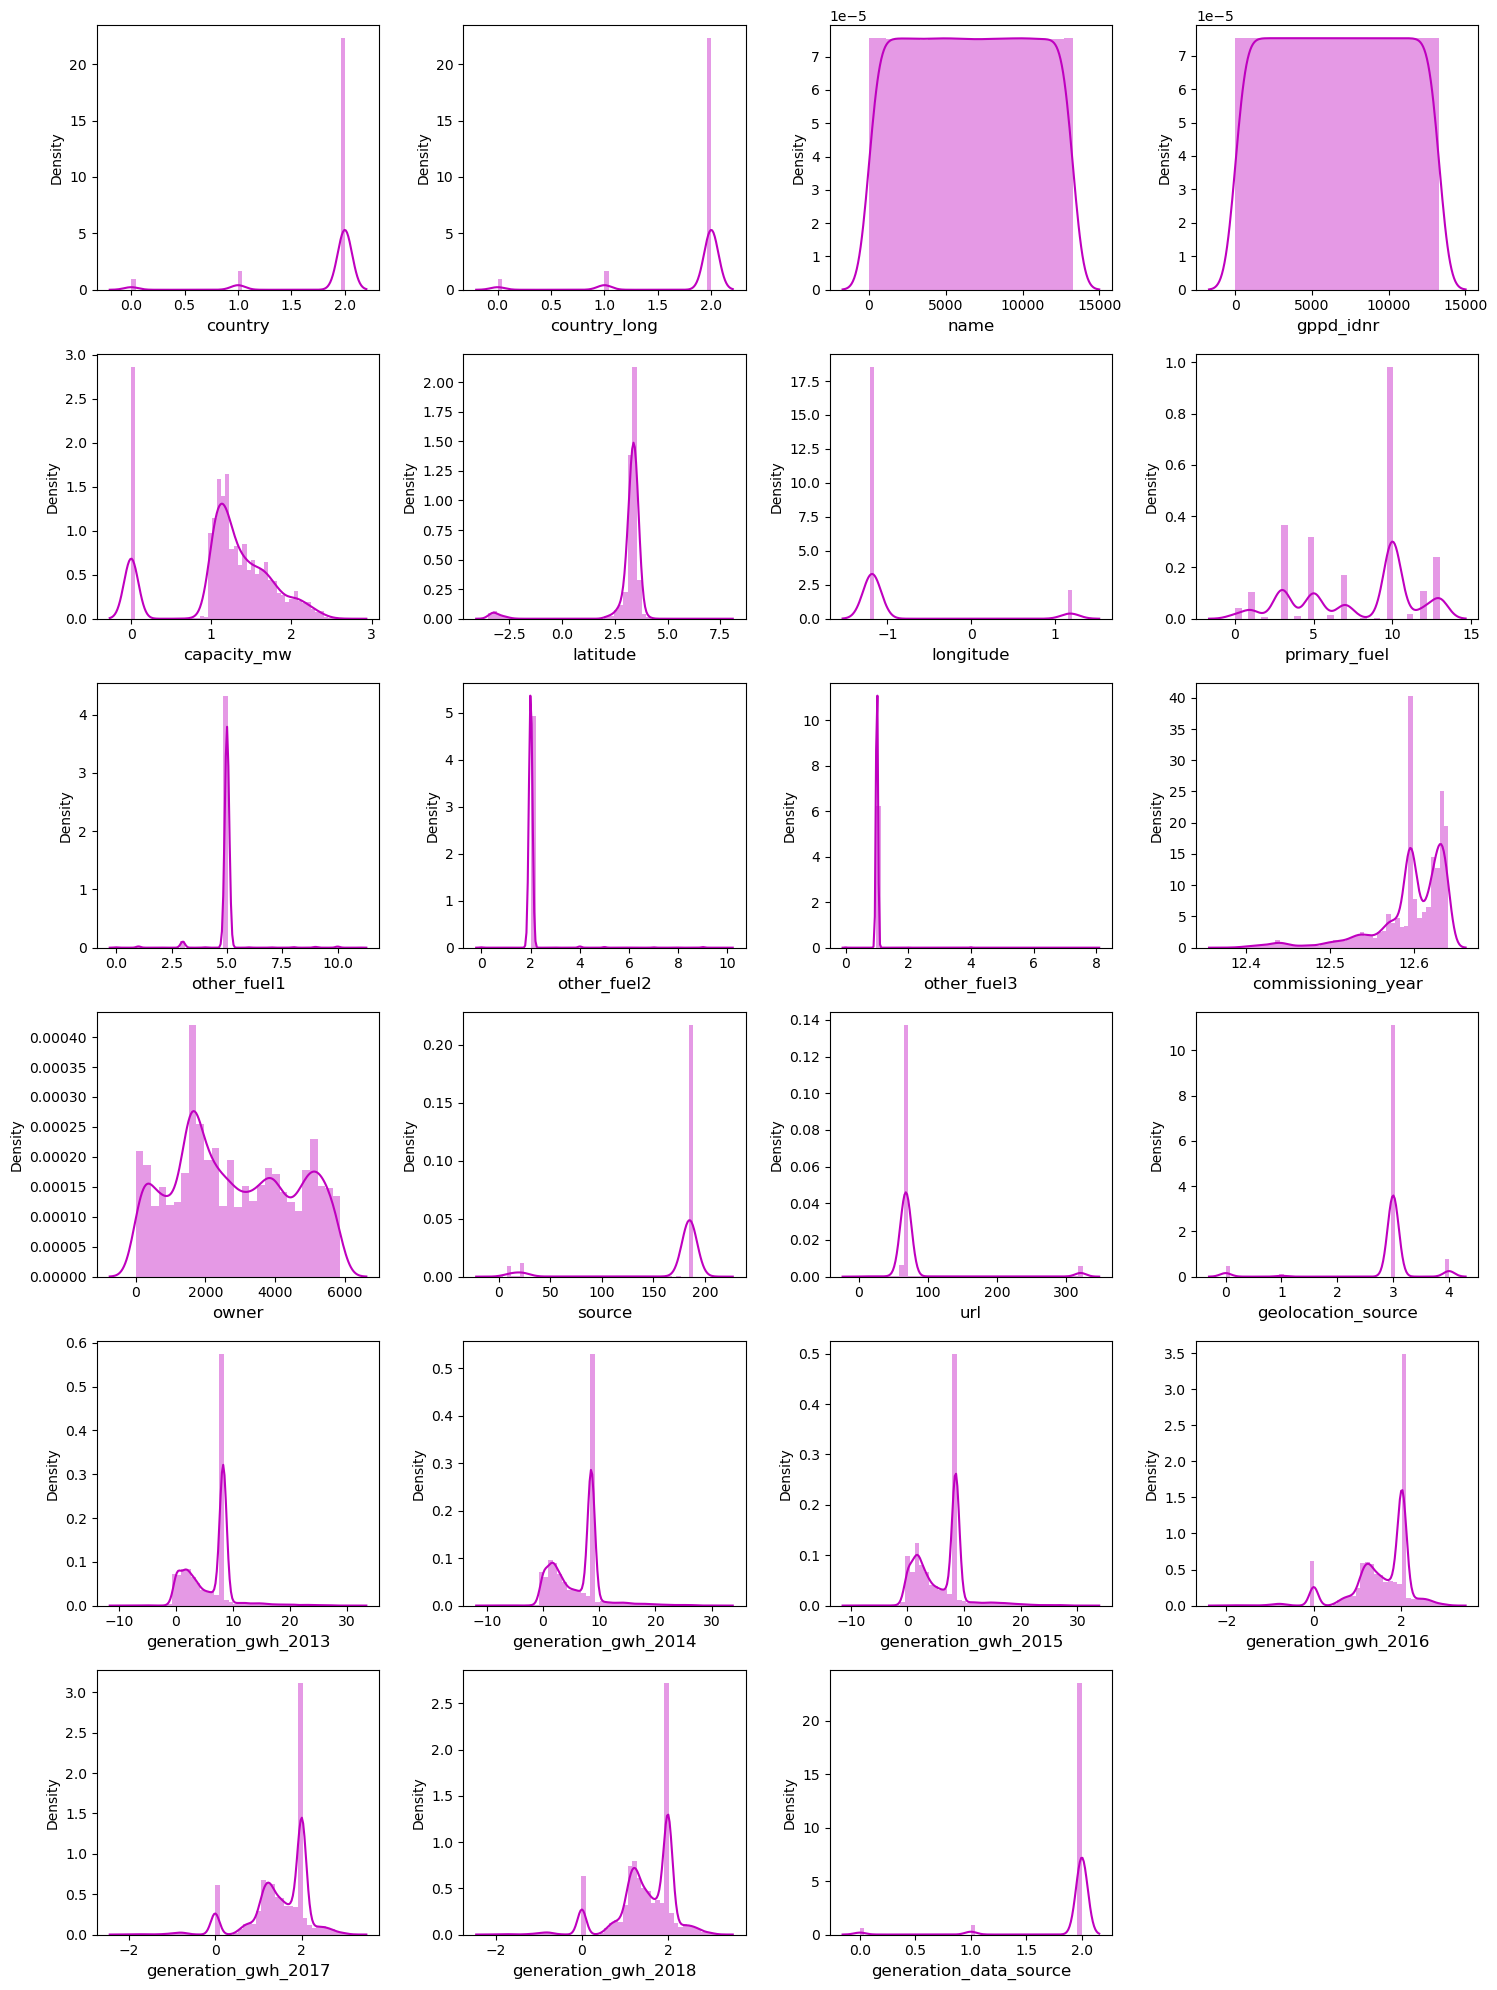

In [539]:
plt.figure(figsize=(15,20),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [540]:
# Checking the correlation between features and target
cor=df.corr()
cor

country  country_long      name  gppd_idnr  \
country                 1.000000      1.000000 -0.016444   0.310570   
country_long            1.000000      1.000000 -0.016444   0.310570   
name                   -0.016444     -0.016444  1.000000  -0.003858   
gppd_idnr               0.310570      0.310570 -0.003858   1.000000   
capacity_mw            -0.187796     -0.187796 -0.015138  -0.387013   
latitude                0.880833      0.880833 -0.018643   0.324623   
longitude              -0.928139     -0.928139  0.012741  -0.241546   
primary_fuel            0.158047      0.158047  0.010611   0.470258   
other_fuel1            -0.014753     -0.014753 -0.005183   0.067599   
other_fuel2             0.028328      0.028328  0.002996  -0.055565   
other_fuel3             0.015380      0.015380 -0.003343  -0.027897   
commissioning_year      0.004950      0.004950 -0.007553   0.519808   
owner                   0.062466      0.062466  0.302250   0.057951   
source                  0.928912      0.928912 -0.015419   0.304738   
url                    -0.839624     -0.839624  0.018421  -0.214602   
geolocation_source      0.610117      0.610117 -0.008188   0.208801   
generation_gwh_2013    -0.040460     -0.040460 -0.013483   0.264430   
generation_gwh_2014    -0.147128     -0.147128 -0.003509   0.231452   
generation_gwh_2015    -0.149798     -0.149798 -0.005179   0.200236   
generation_gwh_2016    -0.161918     -0.161918 -0.007889   0.211827   
generation_gwh_2017    -0.180128     -0.180128 -0.003604   0.161306   
generation_gwh_2018    -0.190617     -0.190617  0.001575   0.095146   
generation_data_source  0.743696      0.743696 -0.010555   0.372018   

                        capacity_mw  latitude  longitude  primary_fuel  \
country                   -0.187796  0.880833  -0.928139      0.158047   
country_long              -0.187796  0.880833  -0.928139      0.158047   
name                      -0.015138 -0.018643   0.012741      0.010611   
gppd_idnr                 -0.387013  0.324623  -0.241546      0.470258   
capacity_mw                1.000000 -0.113638   0.218376     -0.410693   
latitude                  -0.113638  1.000000  -0.682647      0.080949   
longitude                  0.218376 -0.682647   1.000000     -0.192786   
primary_fuel              -0.410693  0.080949  -0.192786      1.000000   
other_fuel1               -0.027731 -0.013712   0.014736      0.000531   
other_fuel2                0.063211  0.019512  -0.029176     -0.109287   
other_fuel3                0.036767  0.009363  -0.015950     -0.067356   
commissioning_year        -0.077591 -0.008425  -0.007093      0.412168   
owner                     -0.030738  0.014817  -0.082304      0.050004   
source                    -0.223227  0.721659  -0.933639      0.181774   
url                        0.089521 -0.913863   0.654463     -0.011630   
geolocation_source         0.002240  0.834504  -0.351687     -0.047139   
generation_gwh_2013        0.041175 -0.062451   0.029836      0.064175   
generation_gwh_2014        0.073066 -0.077339   0.187904      0.010577   
generation_gwh_2015        0.083375 -0.075784   0.192777     -0.022751   
generation_gwh_2016       -0.028163 -0.103300   0.189284      0.066269   
generation_gwh_2017       -0.031231 -0.117749   0.208206      0.048656   
generation_gwh_2018       -0.021759 -0.124043   0.219690      0.020624   
generation_data_source    -0.186488  0.687330  -0.676327      0.166147   

                        other_fuel1  other_fuel2  other_fuel3  \
country                   -0.014753     0.028328     0.015380   
country_long              -0.014753     0.028328     0.015380   
name                      -0.005183     0.002996    -0.003343   
gppd_idnr                  0.067599    -0.055565    -0.027897   
capacity_mw               -0.027731     0.063211     0.036767   
latitude                  -0.013712     0.019512     0.009363   
longitude                  0.014736    -0.029176    -0.015950   
primary_fuel           

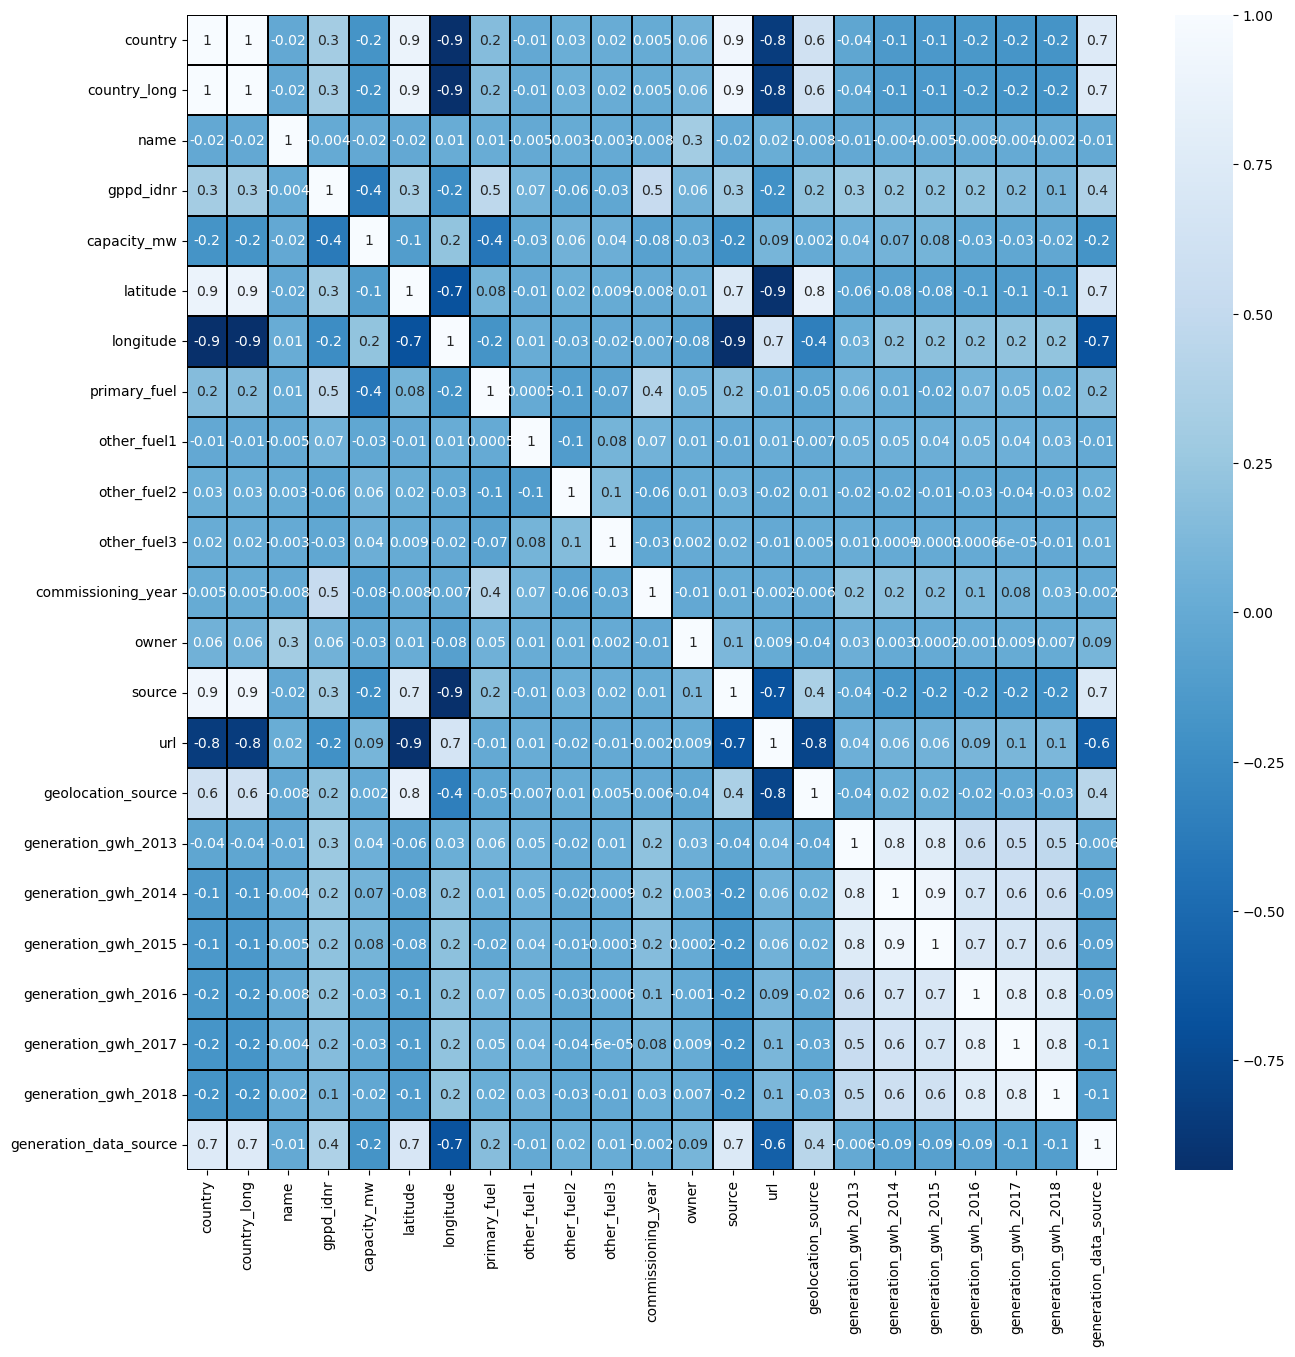

In [541]:
# Visualizing the correlation matrix by plotting the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [542]:
cor['primary_fuel'].sort_values(ascending=False)

primary_fuel              1.000000
gppd_idnr                 0.470258
commissioning_year        0.412168
source                    0.181774
generation_data_source    0.166147
country                   0.158047
country_long              0.158047
latitude                  0.080949
generation_gwh_2016       0.066269
generation_gwh_2013       0.064175
owner                     0.050004
generation_gwh_2017       0.048656
generation_gwh_2018       0.020624
name                      0.010611
generation_gwh_2014       0.010577
other_fuel1               0.000531
url                      -0.011630
generation_gwh_2015      -0.022751
geolocation_source       -0.047139
other_fuel3              -0.067356
other_fuel2              -0.109287
longitude                -0.192786
capacity_mw              -0.410693
Name: primary_fuel, dtype: float64

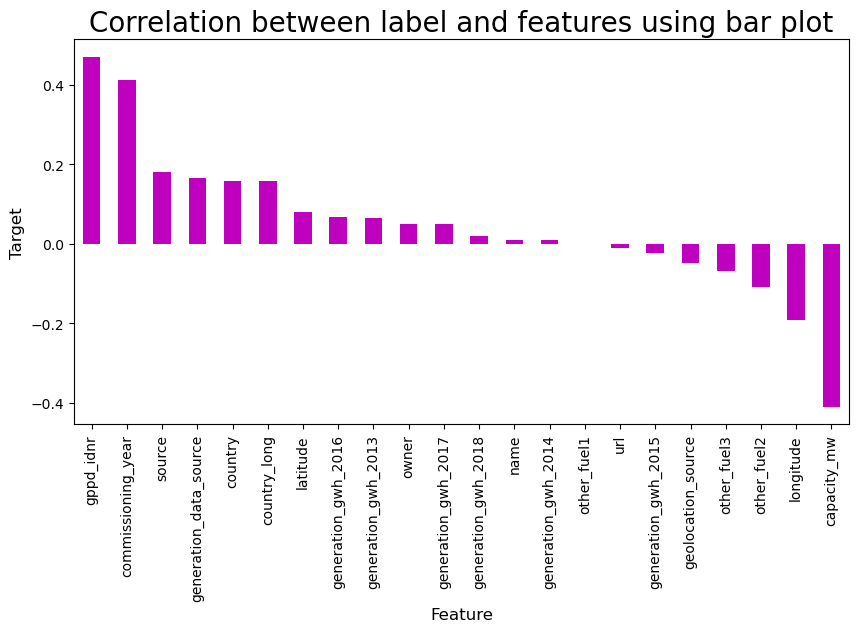

In [543]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(10,5))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Correlation between label and features using bar plot", fontsize=20)
plt.show()

# First Case: To Predict Primary Fuel

In [544]:
# Separating features and label
x=df.drop("primary_fuel",axis=1)
y=df["primary_fuel"]

In [545]:
# Feature scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

country  country_long      name  gppd_idnr  capacity_mw  latitude  \
0     -4.135791     -4.135791 -1.681389  -1.624856    -0.680499 -5.026036   
1     -4.135791     -4.135791 -1.681128  -1.625116    -0.315288 -5.026199   
2     -4.135791     -4.135791 -1.665201  -1.716291     0.368022 -5.029125   
3     -4.135791     -4.135791 -1.658412  -1.615738    -0.561516 -4.715441   
4     -4.135791     -4.135791 -1.632303  -1.673830    -0.035655 -5.016437   
...         ...           ...       ...        ...          ...       ...   
13293  0.323787      0.323787  1.730607   0.106934    -0.070710  0.326350   
13294  0.323787      0.323787  1.730868   1.033526    -0.315288  0.356829   
13295  0.323787      0.323787  1.731129   1.490439    -1.994470  0.351062   
13296  0.323787      0.323787  1.731390  -1.379727    -1.994470  0.256870   
13297  0.323787      0.323787  1.731651   0.489085     0.169414  0.275377   

       longitude  other_fuel1  other_fuel2  other_fuel3  commissioning_year  \
0       2.960718     0.050989    -0.089646    -0.047499            0.594416   
1       2.960741     0.050989    -0.089646    -0.047499            0.003602   
2       2.950760     0.050989    -0.089646    -0.047499            0.003602   
3       2.958621     0.050989    -0.089646    -0.047499            0.272007   
4       2.960820     0.050989    -0.089646    -0.047499            0.778313   
...          ...          ...          ...          ...                 ...   
13293  -0.329239     0.050989    -0.089646    -0.047499            0.640413   
13294  -0.340466     0.050989    -0.089646    -0.047499            0.916076   
13295  -0.340524     0.050989    -0.089646    -0.047499            0.003602   
13296  -0.348073     0.050989    -0.089646    -0.047499            0.003602   
13297  -0.352028     0.050989    -0.089646    -0.047499            0.722044   

          owner    source       url  geolocation_source  generation_gwh_2013  \
0     -1.597796 -3.208385  4.543432           -4.422815             0.547123   
1     -1.597199 -3.208385  4.543432           -4.422815             0.547123   
2      1.623937 -3.208385  4.543432           -4.422815            -0.393112   
3     -1.560161 -3.208385  4.543432           -4.422815             0.547123   
4     -0.522492 -3.208385  4.543432           -4.422815             0.547123   
...         ...       ...       ...                 ...                  ...   
13293  1.826452  0.336481 -0.226671            0.110335            -1.121569   
13294  1.827647  0.336481 -0.226671            0.110335             0.547123   
13295  1.827050  0.336481 -0.226671            0.110335             0.547123   
13296  0.832393  0.336481 -0.226671            0.110335            -1.504829   
13297 -1.342710  0.336481 -0.226671            0.110335            -0.921129   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                 0.559581             0.585072             0.675076   
1                 0.559581             0.585072             0.675076   
2                -0.359972            -0.325769             0.139444   
3                 0.559581             0.585072             0.675076   
4                 0.559581             0.585072             0.675076   
...                    ...                  ...                  ...   
13293            -1.142338            -1.075962            -0.754718   
13294             0.559581             0.585072             0.675076   
13295             0.559581             0.585072             0.675076   
13296            -1.459298            -1.390482             0.675076   
13297            -0.587019            -0.427202             0.077950   

       generation_gwh_2017  generation_gwh_2018  generation_data_source  
0                 0.713710             0.752222                0.232644  
1                 0.713710             0.752222                0.232644  
2                 0.166253             0.236225               -5.507054  
3           

In [546]:
# Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values                Features
0          inf                 country
1          inf            country_long
2     1.106959                    name
3     2.500671               gppd_idnr
4     1.334952             capacity_mw
5    18.591037                latitude
6    20.731237               longitude
7     1.033159             other_fuel1
8     1.049471             other_fuel2
9     1.036247             other_fuel3
10    1.586989      commissioning_year
11    1.146186                   owner
12   16.677166                  source
13    7.865230                     url
14    7.027580      geolocation_source
15    3.248082     generation_gwh_2013
16    7.018440     generation_gwh_2014
17    6.296814     generation_gwh_2015
18    3.778980     generation_gwh_2016
19    4.503704     generation_gwh_2017
20    3.399303     generation_gwh_2018
21    2.615496  generation_data_source

By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features latitude, longitude and source have VIF value very high which means they have high correlation with other features. we will drop one of the column first, if the same issue exist then we will try to remove the column with high VIF.

In [547]:
# Droping longitude Column
x.drop("longitude", axis=1, inplace=True)

In [548]:
# Again Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values                Features
0          inf                 country
1          inf            country_long
2     1.106838                    name
3     2.415145               gppd_idnr
4     1.322342             capacity_mw
5    16.997939                latitude
6     1.033142             other_fuel1
7     1.049460             other_fuel2
8     1.036222             other_fuel3
9     1.573068      commissioning_year
10    1.145862                   owner
11   16.674814                  source
12    7.515341                     url
13    6.573227      geolocation_source
14    3.232155     generation_gwh_2013
15    7.015302     generation_gwh_2014
16    6.295378     generation_gwh_2015
17    3.776974     generation_gwh_2016
18    4.503654     generation_gwh_2017
19    3.396251     generation_gwh_2018
20    2.612823  generation_data_source

In [549]:
# Droping latitude Column
x.drop("latitude", axis=1, inplace=True)

In [550]:
# Again Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values                Features
0          inf                 country
1          inf            country_long
2     1.106665                    name
3     2.237383               gppd_idnr
4     1.309436             capacity_mw
5     1.032982             other_fuel1
6     1.049433             other_fuel2
7     1.036221             other_fuel3
8     1.528050      commissioning_year
9     1.145648                   owner
10   16.563396                  source
11    5.840380                     url
12    4.427801      geolocation_source
13    3.181497     generation_gwh_2013
14    7.012180     generation_gwh_2014
15    6.293156     generation_gwh_2015
16    3.774268     generation_gwh_2016
17    4.503335     generation_gwh_2017
18    3.394071     generation_gwh_2018
19    2.489353  generation_data_source

In [551]:
# Droping source Column
x.drop("source", axis=1, inplace=True)

In [552]:
# Again Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values                Features
0          inf                 country
1          inf            country_long
2     1.105285                    name
3     2.229187               gppd_idnr
4     1.309426             capacity_mw
5     1.032959             other_fuel1
6     1.049423             other_fuel2
7     1.036210             other_fuel3
8     1.527545      commissioning_year
9     1.130790                   owner
10    5.801849                     url
11    2.769855      geolocation_source
12    3.181347     generation_gwh_2013
13    7.011791     generation_gwh_2014
14    6.293091     generation_gwh_2015
15    3.774212     generation_gwh_2016
16    4.503194     generation_gwh_2017
17    3.394070     generation_gwh_2018
18    2.459594  generation_data_source

So, we have solved multicollinearity issue. we can now move ahead for model building

In [553]:
y.value_counts()

10.0    5484
3.0     2031
5.0     1783
13.0    1340
7.0      961
12.0     595
1.0      572
0.0      230
11.0     104
6.0       72
4.0       65
2.0       34
8.0       16
9.0       11
Name: primary_fuel, dtype: int64

Here the data is not balanced. Since it is a classification problem, we will balance the data using over sampling method

In [554]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [555]:
y1.value_counts()

10.0    5484
13.0    5484
7.0     5484
1.0     5484
3.0     5484
5.0     5484
12.0    5484
0.0     5484
6.0     5484
11.0    5484
2.0     5484
4.0     5484
9.0     5484
8.0     5484
Name: primary_fuel, dtype: int64

In [556]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=300)
y_train.head()

11527    10.0
11160     3.0
8658      4.0
3524      7.0
8250      7.0
Name: primary_fuel, dtype: float64

In [ ]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccu=0
maxrs=0
for i in range (1,400):
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy is",maxaccu,"at random_state",maxrs)

The best accuracy is 84.15% at random_state 55

In [315]:
# Classification Algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [316]:
# Checking accuracy for Random Forest Classifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8357894736842105
[[  21    2    0   15    0    2    0    3    0    0    5    0    5    1]
 [   3   86    0   29    0    8    1    0    0    0    0    0    2    0]
 [   0    0    1    3    0    0    0    0    0    0    1    0    1    1]
 [   2   21    0  372    0   32    0   33    0    0   30    2   18   11]
 [   0    0    0    7    1    1    0    0    0    0    2    0    5    8]
 [   0   12    0   12    0  405    0    2    0    0    8    0    7    4]
 [   0    3    0    1    0    0   10    0    0    0    1    0    0    0]
 [   1    4    0   33    0    5    0  178    0    0    9    0    4    5]
 [   0    0    0    1    0    0    0    0    0    0    0    0    2    0]
 [   0    0    0    2    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    4    0    0    0    2    0    0 1326    1    2   21]
 [   0    0    0    0    0    0    0    0    0    0   14   15    0    0]
 [   2    0    0   22    0    4    0    4    0    0   13    0   92   10]
 [   0    0    0   17    0    8 

The accuracy for this model is 83.58%

In [317]:
# Checking accuracy for Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.727218045112782
[[  10    3    0   10    0    7    0    2    0    0   17    0    2    3]
 [   6   72    0   29    0   11    3    1    0    0    0    0    1    6]
 [   0    0    0    1    0    0    0    3    0    0    3    0    0    0]
 [   1   20    0  300    0   52    0   42    0    1   69    0    6   30]
 [   0    0    0   15    0    0    0    0    0    0    3    0    0    6]
 [   0   16    0   29    0  369    0   17    0    0   15    0    2    2]
 [   0    5    0    0    0    1    8    0    0    0    1    0    0    0]
 [   3    7    0   34    0   31    0  124    0    0   31    0    5    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2    1]
 [   0    0    0    1    0    0    0    1    0    0    0    0    0    0]
 [   1    0    0    6    0    2    0    1    0    0 1296    1    1   50]
 [   0    0    0    0    0    0    0    0    0    0   14   15    0    0]
 [   0    0    0   26    0   15    0   12    0    0   66    0   15   13]
 [   0    0    0   62    0    5  

The accuracy for this model is 72.72%

In [318]:
# Checking accuracy for Gradient Boosting Classifier
GB=LogisticRegression()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.727218045112782
[[  10    3    0   10    0    7    0    2    0    0   17    0    2    3]
 [   6   72    0   29    0   11    3    1    0    0    0    0    1    6]
 [   0    0    0    1    0    0    0    3    0    0    3    0    0    0]
 [   1   20    0  300    0   52    0   42    0    1   69    0    6   30]
 [   0    0    0   15    0    0    0    0    0    0    3    0    0    6]
 [   0   16    0   29    0  369    0   17    0    0   15    0    2    2]
 [   0    5    0    0    0    1    8    0    0    0    1    0    0    0]
 [   3    7    0   34    0   31    0  124    0    0   31    0    5    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2    1]
 [   0    0    0    1    0    0    0    1    0    0    0    0    0    0]
 [   1    0    0    6    0    2    0    1    0    0 1296    1    1   50]
 [   0    0    0    0    0    0    0    0    0    0   14   15    0    0]
 [   0    0    0   26    0   15    0   12    0    0   66    0   15   13]
 [   0    0    0   62    0    5  

The accuracy for this model is 72.72%

In [319]:
# Checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.7711278195488722
[[  18    6    0    5    0    2    0    4    0    0   11    0    5    3]
 [   0   74    0   34    0    8    2    2    0    0    1    0    4    4]
 [   0    0    0    1    0    1    0    2    0    0    3    0    0    0]
 [   2    8    0  337    0   32    0   38    0    0   66    0    6   32]
 [   0    0    0   11    0    2    0    0    0    0    2    0    1    8]
 [   0   13    0   27    0  388    0    5    0    0   13    0    2    2]
 [   0    7    0    1    0    0    6    0    0    0    1    0    0    0]
 [   6    4    0   39    0   12    0  152    0    0   18    0    4    4]
 [   0    0    0    1    0    0    0    0    0    0    0    0    2    0]
 [   1    0    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    8    0    0    0    2    0    0 1319    1    7   21]
 [   0    0    0    0    0    0    0    0    0    0   17   12    0    0]
 [   0    1    0   35    0    5    0    4    0    0   40    0   36   26]
 [   0    1    0   25    0    8 

The accuracy for this model is 77.11%

In [320]:
# Checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.5744360902255639
[[   0    0    0    0    0   23    0    0    0    0   31    0    0    0]
 [   0   29    0   53    0   29    0    0    0    0   18    0    0    0]
 [   0    0    0    0    0    5    0    0    0    0    2    0    0    0]
 [   0   16    0  141    0  280    0    0    0    0   84    0    0    0]
 [   0    0    0    0    0   17    0    0    0    0    7    0    0    0]
 [   0    2    0   27    0  399    0    0    0    0   22    0    0    0]
 [   0   12    0    1    0    1    0    0    0    0    1    0    0    0]
 [   0    0    0    9    0  197    0    0    0    0   33    0    0    0]
 [   0    0    0    0    0    3    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0   24    0    0    0    0 1334    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   22    7    0    0]
 [   0    0    0    0    0  107    0    0    0    0   40    0    0    0]
 [   0    0    0    5    0  130 

The accuracy for this model is 57.44%

In [321]:
# Checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8147368421052632
[[  22    5    0    9    0    1    0    2    0    0    5    0    8    2]
 [   5   85    0   25    0    7    4    1    0    0    0    0    2    0]
 [   0    0    0    4    0    1    0    0    0    0    1    0    1    0]
 [   8   27    0  365    0   27    1   29    0    0   24    4   21   15]
 [   0    0    0    7    2    1    0    0    0    0    2    0    2   10]
 [   1   16    0   25    1  383    0    6    0    0    5    0    7    6]
 [   0    3    0    1    0    2    9    0    0    0    0    0    0    0]
 [   1    5    0   39    0    6    0  172    0    0    4    0    7    5]
 [   0    0    0    1    0    1    0    0    0    0    0    0    1    0]
 [   0    0    0    2    0    0    0    0    0    0    0    0    0    0]
 [   3    1    0    7    0    2    0    7    0    0 1312    2    3   21]
 [   0    0    0    0    0    0    0    1    0    0   13   13    2    0]
 [   4    2    0   25    1    7    2    4    0    1    7    0   85    9]
 [   1    1    0   22    0   11 

The accuracy for this model is 81.47%

In [322]:
# Checking accuracy for ExtraTrees Classifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.835187969924812
[[  26    5    0    5    0    2    0    3    0    0    6    0    6    1]
 [   5   89    0   25    0    7    2    0    0    0    0    0    1    0]
 [   0    0    1    3    0    0    0    0    0    0    1    0    2    0]
 [   3   19    0  369    0   33    0   33    0    0   31    0   21   12]
 [   0    0    0   10    2    2    0    0    0    0    2    0    3    5]
 [   0   14    0   12    0  403    0    3    0    0    8    0    6    4]
 [   0    4    0    0    0    0    9    1    0    0    1    0    0    0]
 [   0    5    0   36    0    9    0  172    0    0   10    0    3    4]
 [   0    0    0    1    0    0    0    0    0    0    0    0    2    0]
 [   1    0    0    1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    5    0    0    0    6    0    0 1320    0    1   25]
 [   0    0    0    0    0    0    0    0    0    0   12   17    0    0]
 [   1    0    0   23    0    6    0    3    0    0   12    0   94    8]
 [   0    0    0   14    0    8  

The accuracy for this model is 83.52%

In [323]:
from sklearn.model_selection import cross_val_score

In [324]:
# Checking cv score for a Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predRFC)-score.mean())

[0.94054441 0.96066428 0.96639531 0.95577988 0.9427548 ]
0.9532277363150424
Differrence between accuracy score and cross validation score is -0.1174382626308319


In [325]:
# Checking cv score for a Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predLR)-score.mean())

[0.5705913  0.58358841 0.6007815  0.59752524 0.59140345]
0.5887779799244569
Differrence between accuracy score and cross validation score is 0.13844006518832508


In [326]:
# Checking cv score for a Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predGB)-score.mean())

[0.5705913  0.58358841 0.6007815  0.59752524 0.59140345]
0.5887779799244569
Differrence between accuracy score and cross validation score is 0.13844006518832508


In [327]:
# Checking cv score for a SVM Classifier
score=cross_val_score(SVC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predSVC)-score.mean())

[0.77839281 0.80084663 0.80605666 0.80403777 0.79283621]
0.7964340163749837
Differrence between accuracy score and cross validation score is -0.02530619682611146


In [328]:
# Checking cv score for a AdaBoost Classifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predABC)-score.mean())

[0.33237822 0.33539564 0.33292087 0.33187887 0.33181374]
0.3328774682093977
Differrence between accuracy score and cross validation score is 0.24155862201616618


In [329]:
# Checking cv score for a Bagging Classifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predBC)-score.mean())

[0.90492316 0.94093129 0.95037447 0.92953435 0.90322371]
0.9257973959862316
Differrence between accuracy score and cross validation score is -0.11106055388096836


In [330]:
# Checking cv score for a ExtrTrees Classifier
score=cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predETC)-score.mean())

[0.95350352 0.96952133 0.97440573 0.96639531 0.96300879]
0.9653669358057109
Differrence between accuracy score and cross validation score is -0.13017896588089883


ExtraTrees Classifier is our best model as the difference between accuracy score and cross validation score is least

# Hyper Parameter Tuning

In [333]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'], 'random_state':[10,50,1000],'max_depth':[0,10,20],'n_jobs':[-2,-1,1],'n_estimators':[50,100,200,300]}

In [334]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [335]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [336]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [337]:
Final_model=ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=200,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.33834586466166


# Plotting ROC and AUC Curve

In [ ]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

# Second Case: To Predict capacity_mw

In [557]:
y=df['capacity_mw']
x=df.drop(columns=['capacity_mw'])

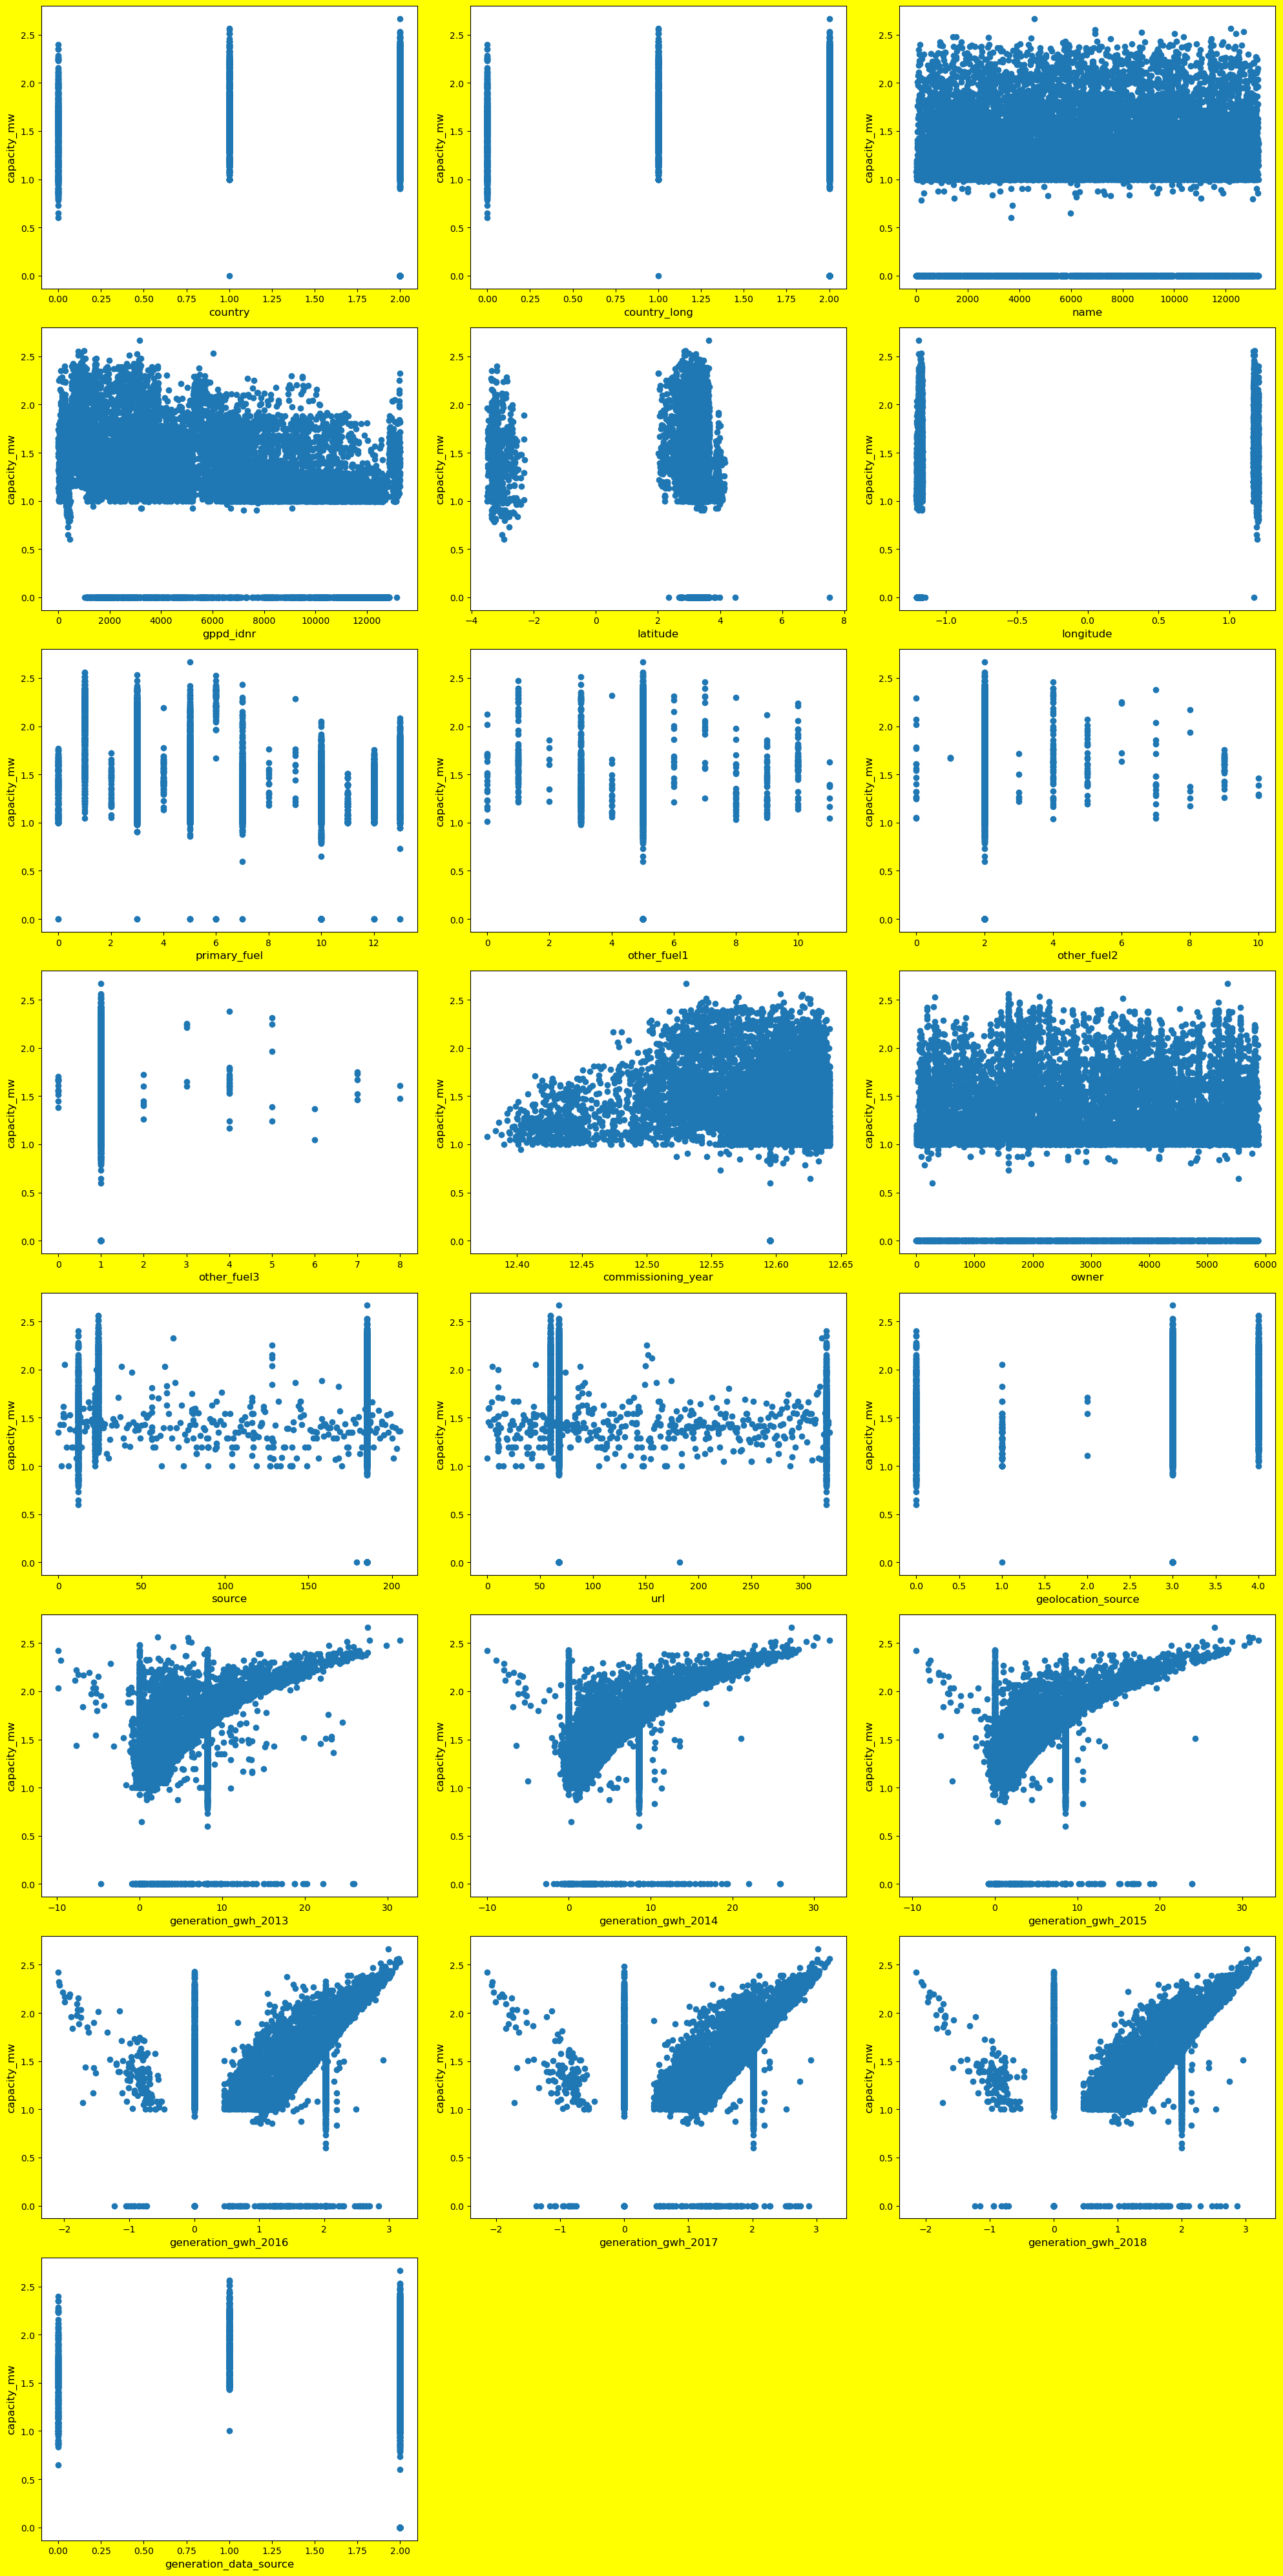

In [558]:
plt.figure(figsize=(20,40),facecolor="Yellow")
plotnumber=1
for col in x:
    if plotnumber<=22:
        ax=plt.subplot(8,3,plotnumber)
        plt.scatter(x[col],y)
        plt.xlabel(col,fontsize=12)
        plt.ylabel('capacity_mw', fontsize=12)
    plotnumber+=1
plt.tight_layout()

As all the features shows a positive trend, it means all the features are important in building the model. The relationship between dependent and independent variables look fairly linear. Thus, our linearly assumption satisfied.

In [559]:
# Data Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-4.13579064, -4.13579064, -1.68138885, ...,  0.71370972,
         0.7522219 ,  0.2326438 ],
       [-4.13579064, -4.13579064, -1.68112775, ...,  0.71370972,
         0.7522219 ,  0.2326438 ],
       [-4.13579064, -4.13579064, -1.66520093, ...,  0.16625337,
         0.23622504, -5.50705437],
       ...,
       [ 0.32378722,  0.32378722,  1.73112917, ...,  0.71370972,
         0.7522219 ,  0.2326438 ],
       [ 0.32378722,  0.32378722,  1.73139026, ...,  0.71370972,
         0.7522219 ,  0.2326438 ],
       [ 0.32378722,  0.32378722,  1.73165136, ...,  0.13553904,
         0.17980084,  0.2326438 ]])

In [560]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=300)
y_train.head()

11527    1.091558
11160    1.994737
8658     1.459233
3524     1.537463
8250     1.795561
Name: capacity_mw, dtype: float64

In [561]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [562]:
# Before testing the model we'll try to predict on one sample
df.tail(2)

country  country_long     name  gppd_idnr  capacity_mw  latitude  \
11877      2.0           2.0  13263.0     1352.0     0.000000  3.412449   
11878      2.0           2.0  13264.0     8526.0     1.288654  3.435855   

       longitude  primary_fuel  other_fuel1  other_fuel2  other_fuel3  \
11877  -1.188123          10.0          5.0          2.0          1.0   
11878  -1.190978           3.0          5.0          2.0          1.0   

       commissioning_year   owner  source   url  geolocation_source  \
11877           12.595398  4208.0   185.0  68.0                 3.0   
11878           12.628071   567.0   185.0  68.0                 3.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
11877             0.000000             0.000000             0.000000   
11878             2.349404             3.715107             4.150612   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
11877             2.020727             2.008732             2.000728   
11878             1.618928             1.619490             1.616168   

       generation_data_source  
11877                     2.0  
11878                     2.0

In [563]:
print('Predicted capacity_mw is:',regression.predict(scaler.transform([[2.0,2.0,13263.0,1352.0,3.412449,-1.188123,10.0,5.0,2.0,1.0,12.595398,4208.0,185.0,68.0,3.0,0.000000,0.000000,0.000000,2.020727,2.008732,2.000728,2.0]])))

Predicted capacity_mw is: [1.23135948]


Predicted capacity_mw is 1.23135948, but actual capacity_mw is 0.000000

In [564]:
# Save the model before using it for prediction
pickle.dump(regression,open('powerplant_model','wb'))

In [565]:
# Prediction using the saved model
loaded_model=pickle.load(open('powerplant_model','rb'))
a=loaded_model.predict(scaler.transform([[2.0,2.0,13264.0,8526.0,3.435855,-1.190978,3.0,5.0,2.0,1.0,12.628071,567.0,185.0,68.0,3.0,2.349404,3.715107,4.150612,1.618928,1.619490,1.616168,2.0]]))
a

array([1.27327333])

Predicted capacity_mw is 1.27327333, but actual capacity_mw is 1.288654

In [566]:
# Predict the model on test data
x_test[1]
y_pred=regression.predict(x_test)
y_pred

array([1.40668084, 1.00866686, 0.99561398, ..., 1.64534417, 0.73494137,
       1.10313769])

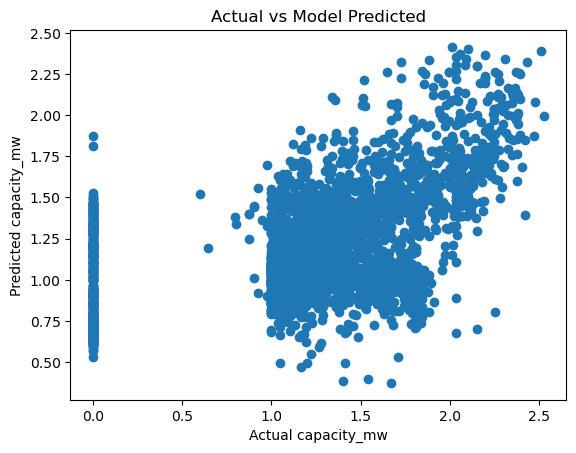

In [567]:
# Compare predicted label and actual label using visualization
plt.scatter(y_test,y_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual vs Model Predicted')
plt.show()